In [3]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from IPython.core.display import display , HTML
display(HTML('<style>.container {width : 150% !important}</style>'))

C:\Users\User\AppData\Local\Temp\ipykernel_17172\3738005869.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display , HTML


In [3]:
results_dict = { 'Asia' : {'Number of Variables' : 8 , 'Time Taken For GOBNILP' : 1.79, 'Time Taken for Hybrid' : 1.45 , 'Reduction in %' : format(1.45 / 1.79 * 100, '.2f'), 'F-score' : 1.000 },
               'Child' : {'Number of Variables' : 20, 'Time Taken For GOBNILP' : 5.21, 'Time Taken for Hybrid' : 15.14 , 'Reduction in %' : format(15.21 / 5.21 * 100, '.2f'), 'F-score' : 0.980},
               'Insurance' : {'Number of Variables' : 27, 'Time Taken For GOBNILP' : 32.55, 'Time Taken for Hybrid' : 32.39 , 'Reduction in %' : format(32.39 / 32.55 * 100, '.2f'), 'F-score' : 0.967}, 
                'Water' : {'Number of Variables' : 32, 'Time Taken For GOBNILP' : 12.17, 'Time Taken for Hybrid' : 4.47 , 'Reduction in %' : format(4.47 / 12.17 * 100, '.2f'), 'F-score' : 0.606},
               'Alarm' :  {'Number of Variables' : 37, 'Time Taken For GOBNILP' : 211.31, 'Time Taken for Hybrid' : 29.01 , 'Reduction in %' : format(29.01 / 211.31 * 100, '.2f'), 'F-score' : 0.952},
               'Barley' :  {'Number of Variables' : 48, 'Time Taken For GOBNILP' : 99.35, 'Time Taken for Hybrid' : 145.23 , 'Reduction in %' : format(145.23 / 99.35 * 100, '.2f'), 'F-score' : 0.788},
               'Hepar2' :  {'Number of Variables' : 70 , 'Time Taken For GOBNILP' : 251.09, 'Time Taken for Hybrid' : 67.50 , 'Reduction in %' : format(67.50 / 251.09 * 100, '.2f'), 'F-score' : 0.925}}
                
                
                
#                 'PathFinder' : {'Number of Variables' : 109, 'Time Taken For GOBNILP' : float('inf'), 'Time Taken for Hybrid' : 1020, 'Reduction in %' : None, 'F-score' : None},
#                'Andes' :  {'Number of Variables' : 223, 'Time Taken For GOBNILP' : float('inf'), 'Time Taken for Hybrid' : 1969.47 , 'Reduction in %' : None, 'F-score' : None},
#                'Link' :  {'Number of Variables' : 724, 'Time Taken For GOBNILP' : float('inf'), 'Time Taken for Hybrid' : None , 'Reduction in %' : None, 'F-score' : None}
#                }
    

In [4]:
k = pd.DataFrame(results_dict).T

In [5]:
k = k.reset_index().rename(columns={'index':'Network'})

In [6]:
k

Network Number of Variables Time Taken For GOBNILP Time Taken for Hybrid  \
0       Asia                   8                   1.79                  1.45   
1      Child                  20                   5.21                 15.14   
2  Insurance                  27                  32.55                 32.39   
3      Water                  32                  12.17                  4.47   
4      Alarm                  37                 211.31                 29.01   
5     Barley                  48                  99.35                145.23   
6     Hepar2                  70                 251.09                  67.5   

  Reduction in % F-score  
0          81.01     1.0  
1         291.94    0.98  
2          99.51   0.967  
3          36.73   0.606  
4          13.73   0.952  
5         146.18   0.788  
6          26.88   0.925

In [7]:
x = np.array(k['Number of Variables'])
y1 = np.array(k['Time Taken For GOBNILP'])
y2 = np.array(k['Time Taken for Hybrid'])

In [8]:
x, y1, y2

(array([8, 20, 27, 32, 37, 48, 70], dtype=object),
 array([1.79, 5.21, 32.55, 12.17, 211.31, 99.35, 251.09], dtype=object),
 array([1.45, 15.14, 32.39, 4.47, 29.01, 145.23, 67.5], dtype=object))

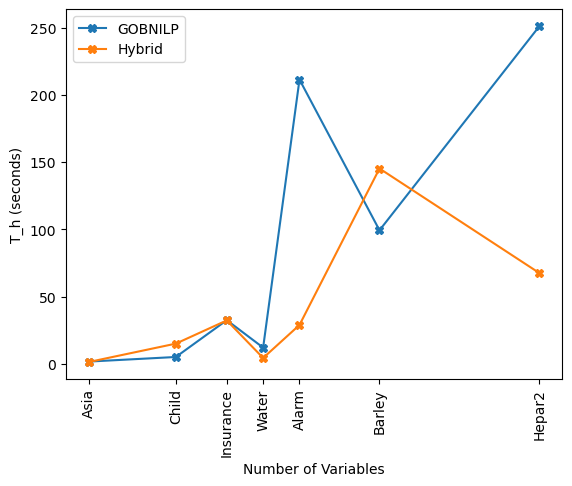

<Figure size 1000x1000 with 0 Axes>

In [9]:
plt.plot(x, y1, label='GOBNILP', marker='X')
plt.plot(x, y2, label='Hybrid', marker='X')
plt.xlabel('Number of Variables')
plt.xticks(k['Number of Variables'], k['Network'], rotation=90)
plt.ylabel('T_h (seconds)')
# plt.yticks([])
# plt.title('Comparing GOBNILP and the Hybrid Algorithm')
plt.legend()
plt.figure(figsize=(10,10))
plt.show()

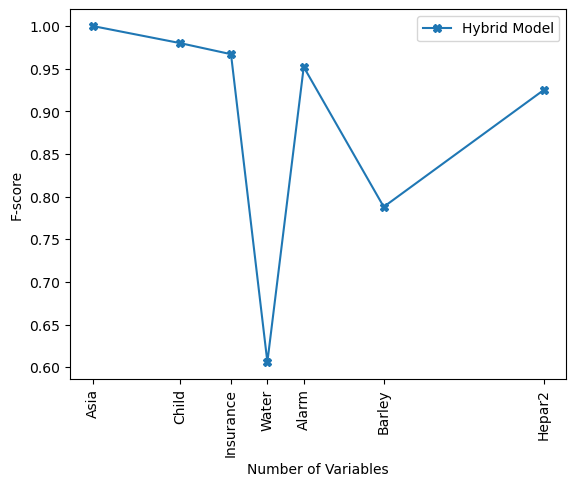

<Figure size 1000x1000 with 0 Axes>

In [214]:
x = np.array(k['Number of Variables'])
y = np.array(k['F-score'])

plt.plot(x, y, label='Hybrid Model', marker='X')
plt.xticks(k['Number of Variables'], k['Network'], rotation=90)
plt.xlabel('Number of Variables')
plt.ylabel('F-score')
# plt.title('Model Accuracy Evaluation')
plt.legend()
plt.figure(figsize=(10,10))
plt.show()

### significance threshold

In [44]:
asia_data = {'Significance Threshold' : [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50], 'Number of Edges Removed' : [19, 19, 19, 17, 16, 13, 11], 'F-score' : [1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000], 'Runtime' : [0.707, 0.751, 0.803, 0.840, 0.880, 0.960, 1.021]}
asia_df = pd.DataFrame(asia_data)

child_data = {'Significance Threshold' : [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50], 'Number of Edges Removed' : [156, 154, 153, 144, 136, 127, 117], 'F-score' : [0.980, 0.980, 0.980, 0.980, 0.980, 0.958, 0.980], 'Runtime' : [7.49, 8.42, 8.43, 9.71, 10.45, 11.10, 23.08]}
child_df = pd.DataFrame(child_data)

insurance_data = {'Significance Threshold' : [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50], 'Number of Edges Removed' : [268, 254, 246, 234, 222, 212, 193], 'F-score' : [0.978, 0.967, 0.989, 0.989, 0.944, 0.989, 0.989], 'Runtime' : [16.76, 19.46, 21.93, 24.41, 28.54, 33.82, 35.82]}
insurance_df = pd.DataFrame(insurance_data)

water_data = {'Significance Threshold' : [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50], 'Number of Edges Removed' : [478, 470, 468, 458, 451, 439, 431], 'F-score' : [0.563, 0.606, 0.588, 0.638, 0.676, 0.704, 0.704], 'Runtime' : [1.59, 2.02, 2.61, 3.48, 4.59, 6.38, 7.49]}
water_df = pd.DataFrame(water_data)
#water_data produced lots of false negative (type II error) after performing hypothesis test

alarm_data = {'Significance Threshold' : [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50], 'Number of Edges Removed' : [598, 593, 589, 579, 568, 546, 533], 'F-score' : [0.965, 0.952, 0.977, 0.977, 0.977, 0.952, 0.977], 'Runtime' : [24.88, 21.68, 24.24, 29.85, 35.80, 42.71, 56.44]}
alarm_df = pd.DataFrame(alarm_data)

barley_data = {'Significance Threshold' : [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50], 'Number of Edges Removed' : [971, 957, 939, 921, 904, 880, 857], 'F-score' : [0.860, 0.860, 0.857, 0.821, 0.818, 0.862, 0.862], 'Runtime' : [100.14, 118.43, 146.19, 177.57, 201.21, 238.75, 261.73]}
barley_df = pd.DataFrame(barley_data)

hepar2_data = {'Significance Threshold' : [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50], 'Number of Edges Removed' : [2307, 2298, 2287, 2242, 2194, 2142, 2074], 'F-score' : [0.925, 0.925, 0.925, 0.926, 0.926, 0.920, 0.920], 'Runtime' : [27.61, 38.74, 46.78, 93.47, 133.96, 163.66, 233.39]}
hepar2_df = pd.DataFrame(hepar2_data)

sig_dict = {'Asia' : asia_df, 'Child' : child_df, 'Insurance' : insurance_df, 'Water' : water_df, 'Alarm' : alarm_df, 'Barley' : barley_df, 'Hepar2' : hepar2_df}

In [12]:
hepar2_df

Significance Threshold  Number of Edges Removed  F-score  Runtime
0                    0.01                     2307    0.925    27.61
1                    0.05                     2298    0.925    38.74
2                    0.10                     2287    0.925    46.78
3                    0.20                     2242    0.926    93.47
4                    0.30                     2194    0.926   133.96
5                    0.40                     2142    0.920   163.66
6                    0.50                     2074    0.920   233.39

In [13]:
sig_dict['Hepar2']

Significance Threshold  Number of Edges Removed  F-score  Runtime
0                    0.01                     2307    0.925    27.61
1                    0.05                     2298    0.925    38.74
2                    0.10                     2287    0.925    46.78
3                    0.20                     2242    0.926    93.47
4                    0.30                     2194    0.926   133.96
5                    0.40                     2142    0.920   163.66
6                    0.50                     2074    0.920   233.39

### Asia Network

(0.0, 1.1)

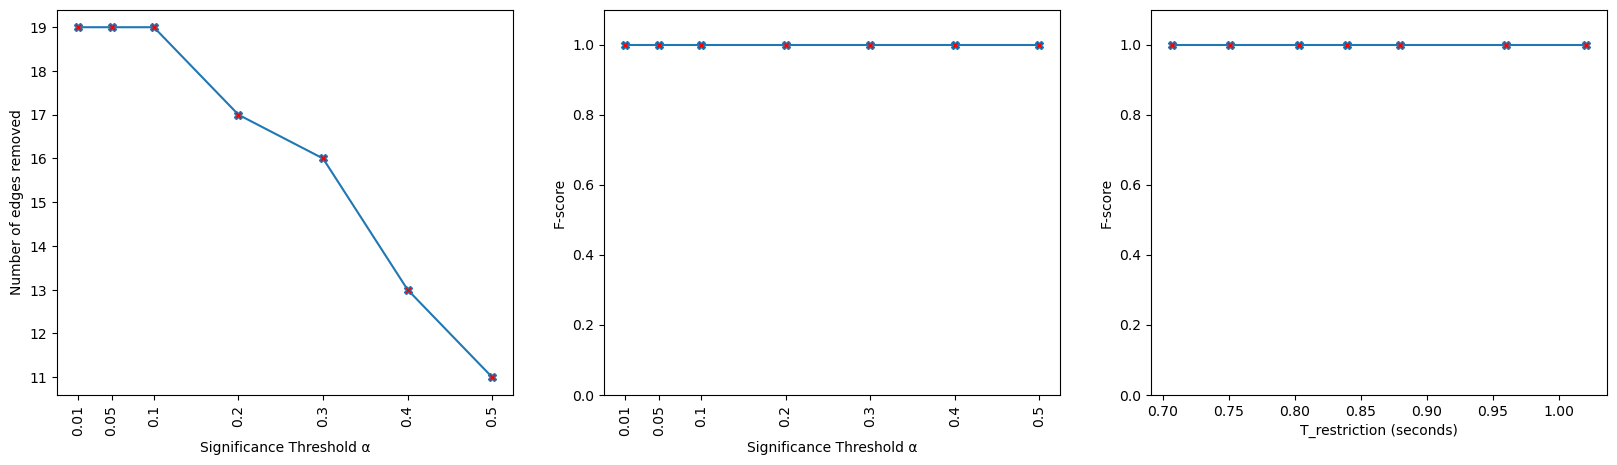

In [45]:
figure , axis = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
df = pd.DataFrame(sig_dict['Asia'])
x = np.array(df['Significance Threshold'])
y1 = np.array(df['Number of Edges Removed'])
y2 = np.array(df['F-score'])
y3 = np.array(df['Runtime'])

axis[0].plot(x,y1, marker='X', markerfacecolor='r')
axis[0].set_xlabel('Significance Threshold α')
axis[0].set_ylabel('Number of edges removed')
axis[0].set_xticks(df['Significance Threshold'], df['Significance Threshold'], rotation=90)

axis[1].plot(x,y2, marker='X', markerfacecolor='r')
axis[1].set_xlabel('Significance Threshold α')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Significance Threshold'], df['Significance Threshold'], rotation=90)
axis[1].set_ylim([0,1.1])


axis[2].plot(y3,y2, marker='X', markerfacecolor='r')
axis[2].set_xlabel('T_restriction (seconds)')
axis[2].set_ylabel('F-score')
axis[2].set_ylim([0,1.1])
# axis[2].set_xticks([])


# figure.suptitle('Asia Network : Relationship between Significance Threshold, F-score, and Runtime')


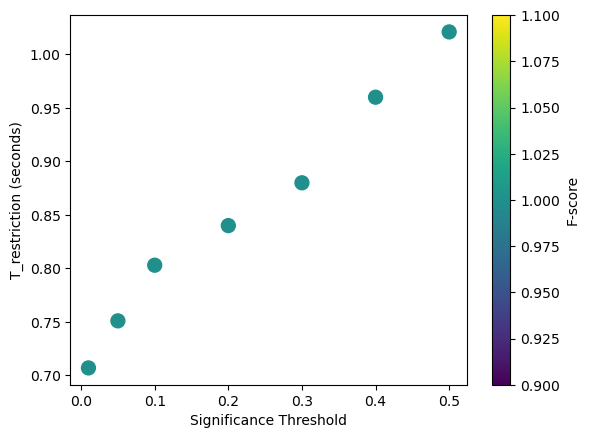

In [46]:
# Generate some example data
# Generate some example data
df = sig_dict['Asia']
# Create a scatter plot with F-score on the y-axis and runtime on the x-axis
runtime = df['Runtime']
f_score = df['F-score']
sig_threshold = df['Significance Threshold']
fig, ax = plt.subplots()
scatter = ax.scatter(sig_threshold, runtime, c=f_score, cmap='viridis', s=100)

# Add labels and title to the plot
ax.set_xlabel('Significance Threshold')
ax.set_ylabel('T_restriction (seconds)')
# ax.set_yticks([])

# ax.set_title('Asia Network : Trade-off between maximizing F-score and minimizing runtime')

# Add a colorbar for the significance threshold
cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.set_ylabel('F-score')

# Show the plot
plt.show()

## Child Network

Text(0.5, 0.04, 'The Child Network')

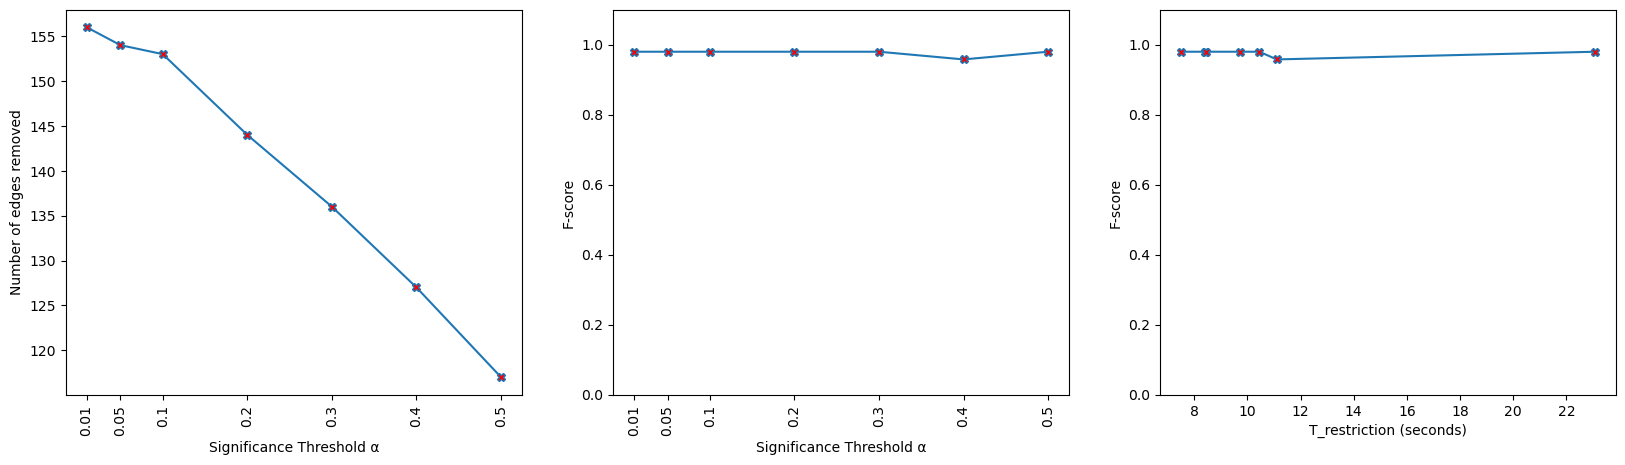

In [19]:
figure , axis = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
df = pd.DataFrame(sig_dict['Child'])
x = np.array(df['Significance Threshold'])
y1 = np.array(df['Number of Edges Removed'])
y2 = np.array(df['F-score'])
y3 = np.array(df['Runtime'])

axis[0].plot(x,y1, marker='X', markerfacecolor='r')
axis[0].set_xlabel('Significance Threshold α')
axis[0].set_ylabel('Number of edges removed')
axis[0].set_xticks(df['Significance Threshold'], df['Significance Threshold'], rotation=90)

axis[1].plot(x,y2, marker='X', markerfacecolor='r')
axis[1].set_xlabel('Significance Threshold α')
axis[1].set_ylabel('F-score')
axis[1].set_ylim([0,1.1])
axis[1].set_xticks(df['Significance Threshold'], df['Significance Threshold'], rotation=90)

axis[2].plot(y3,y2, marker='X', markerfacecolor='r')
axis[2].set_xlabel('T_restriction (seconds)')
axis[2].set_ylabel('F-score')
axis[2].set_ylim([0,1.1])
# axis[2].set_xticks([])

fig.text(0.5, 0.04, 'The Child Network', ha='center', fontsize=14)
# figure.suptitle('Child Network : Relationship between Significance Threshold, F-score, and Runtime')


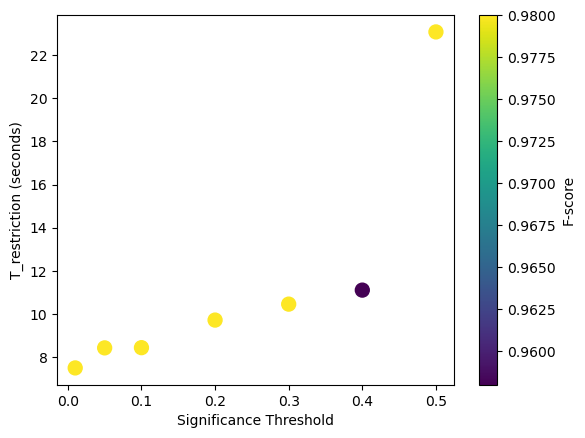

In [21]:
# Generate some example data
# Generate some example data
df = sig_dict['Child']
# Create a scatter plot with F-score on the y-axis and runtime on the x-axis
runtime = df['Runtime']
f_score = df['F-score']
sig_threshold = df['Significance Threshold']
fig, ax = plt.subplots()
scatter = ax.scatter(sig_threshold, runtime, c=f_score, cmap='viridis', s=100)

# Add labels and title to the plot
ax.set_xlabel('Significance Threshold')
ax.set_ylabel('T_restriction (seconds)')
# ax.set_yticks([])

# ax.set_title('Child Network : Trade-off between maximizing F-score and minimizing runtime')

# Add a colorbar for the significance threshold
cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.set_ylabel('F-score')

# Show the plot
plt.show()

### Insurance network

(0.0, 1.1)

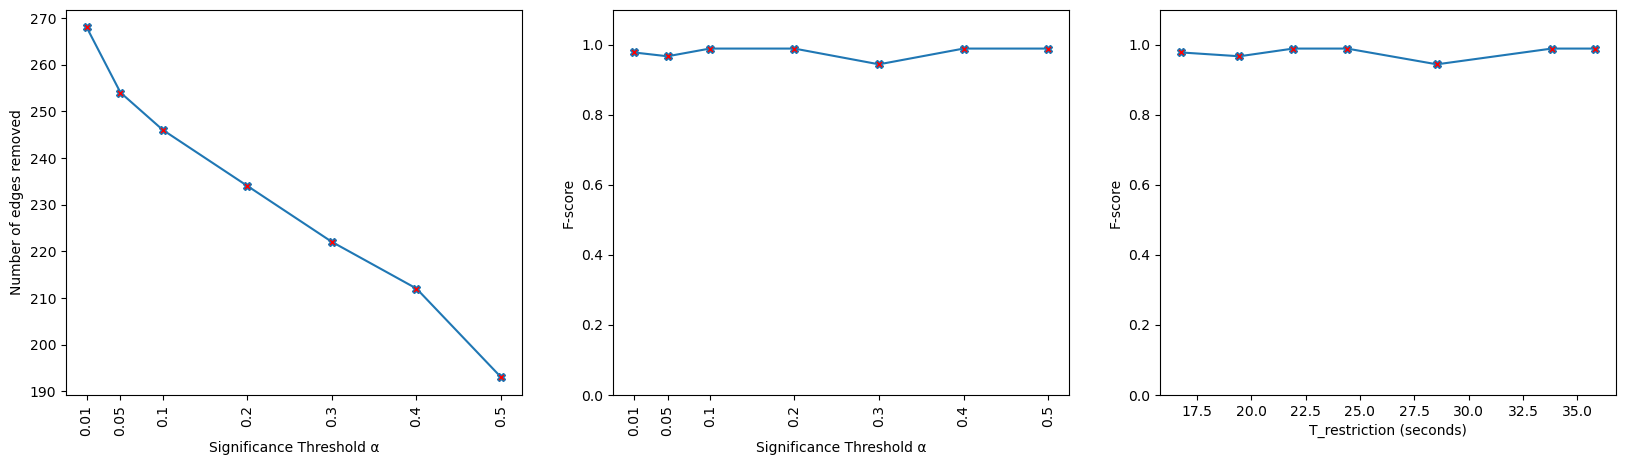

In [22]:
figure , axis = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
df = pd.DataFrame(sig_dict['Insurance'])
x = np.array(df['Significance Threshold'])
y1 = np.array(df['Number of Edges Removed'])
y2 = np.array(df['F-score'])
y3 = np.array(df['Runtime'])

axis[0].plot(x,y1, marker='X', markerfacecolor='r')
axis[0].set_xlabel('Significance Threshold α')
axis[0].set_ylabel('Number of edges removed')
axis[0].set_xticks(df['Significance Threshold'], df['Significance Threshold'], rotation=90)

axis[1].plot(x,y2, marker='X', markerfacecolor='r')
axis[1].set_xlabel('Significance Threshold α')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Significance Threshold'], df['Significance Threshold'], rotation=90)
axis[1].set_ylim([0,1.1])


axis[2].plot(y3,y2, marker='X', markerfacecolor='r')
axis[2].set_xlabel('T_restriction (seconds)')
axis[2].set_ylabel('F-score')
axis[2].set_ylim([0,1.1])
# axis[2].set_xticks([])

# figure.suptitle('Insurance Network : Relationship between Significance Threshold, F-score, and Runtime')



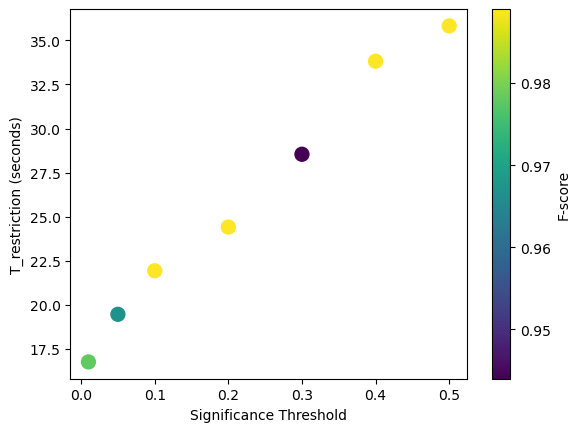

In [23]:
# Generate some example data
df = sig_dict['Insurance']
# Create a scatter plot with F-score on the y-axis and runtime on the x-axis
runtime = df['Runtime']
f_score = df['F-score']
sig_threshold = df['Significance Threshold']
fig, ax = plt.subplots()
scatter = ax.scatter(sig_threshold, runtime, c=f_score, cmap='viridis', s=100)

# Add labels and title to the plot
ax.set_xlabel('Significance Threshold')
ax.set_ylabel('T_restriction (seconds)')
# ax.set_yticks([])

# ax.set_title('Insurance Network : Trade-off between maximizing F-score and minimizing runtime')

# Add a colorbar for the significance threshold
cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.set_ylabel('F-score')

# Show the plot
plt.show()

### Water Network

(0.0, 1.1)

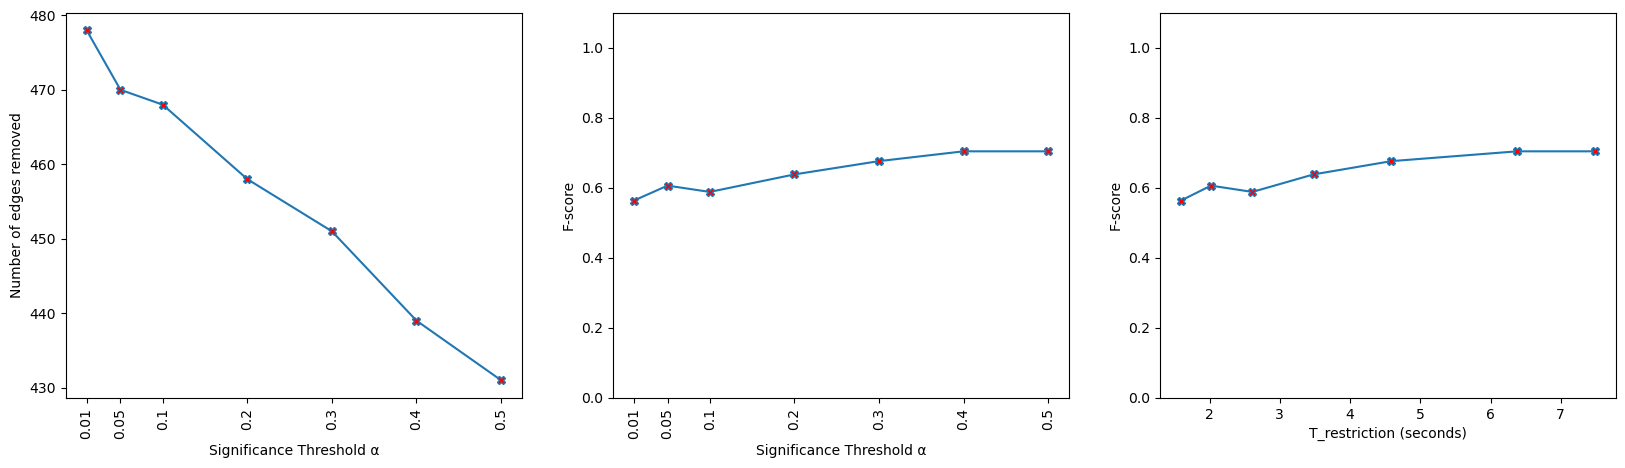

In [24]:
figure , axis = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
df = pd.DataFrame(sig_dict['Water'])
x = np.array(df['Significance Threshold'])
y1 = np.array(df['Number of Edges Removed'])
y2 = np.array(df['F-score'])
y3 = np.array(df['Runtime'])

axis[0].plot(x,y1,marker='X', markerfacecolor='r')
# axis[0].set_title('The Water Network')
axis[0].set_xlabel('Significance Threshold α')
axis[0].set_ylabel('Number of edges removed')
axis[0].set_xticks(df['Significance Threshold'], df['Significance Threshold'], rotation=90)

axis[1].plot(x,y2, marker='X', markerfacecolor='r')
# axis[1].set_title('The W Network')
axis[1].set_xlabel('Significance Threshold α')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Significance Threshold'], df['Significance Threshold'], rotation=90)
axis[1].set_ylim([0,1.1])


axis[2].plot(y3,y2, marker='X', markerfacecolor='r')
# axis[2].set_title('The Insurance Network')
axis[2].set_xlabel('T_restriction (seconds)')
axis[2].set_ylabel('F-score')
axis[2].set_ylim([0,1.1])
# axis[2].set_xticks([])
# figure.suptitle('Water Network : Relationship between Significance Threshold, F-score, and Runtime')


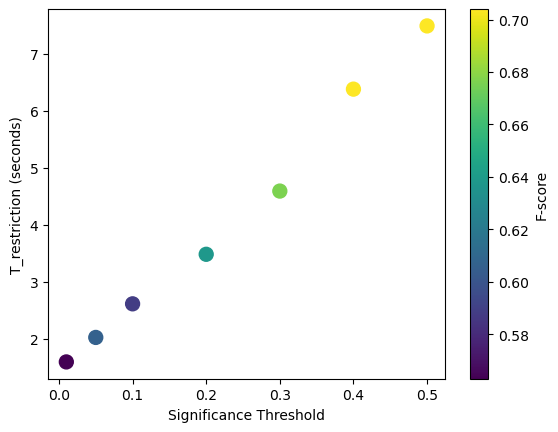

In [25]:
# Generate some example data
df = sig_dict['Water']
# Create a scatter plot with F-score on the y-axis and runtime on the x-axis
runtime = df['Runtime']
f_score = df['F-score']
sig_threshold = df['Significance Threshold']
fig, ax = plt.subplots()
scatter = ax.scatter(sig_threshold, runtime, c=f_score, cmap='viridis', s=100)

# Add labels and title to the plot
ax.set_xlabel('Significance Threshold')
ax.set_ylabel('T_restriction (seconds)')
# ax.set_yticks([])
# ax.set_title('Water Network : Trade-off between maximizing F-score and minimizing runtime')

# Add a colorbar for the significance threshold
cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.set_ylabel('F-score')

# Show the plot
plt.show()

### Alarm Network

In [21]:
df

Significance Threshold  Number of Edges Removed  F-score  Runtime
0                    0.01                      478    0.563     1.59
1                    0.05                      470    0.606     2.02
2                    0.10                      468    0.588     2.61
3                    0.20                      458    0.638     3.48
4                    0.30                      451    0.676     4.59
5                    0.40                      439    0.704     6.38
6                    0.50                      431    0.704     7.49

(0.0, 1.1)

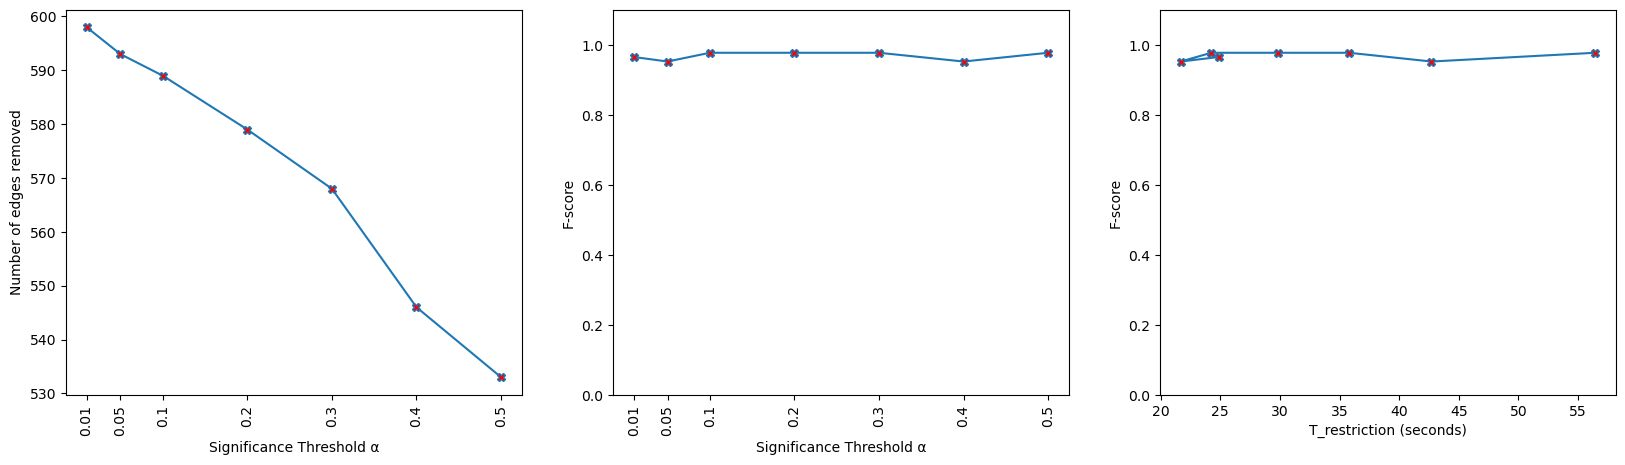

In [27]:
figure , axis = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
df = pd.DataFrame(sig_dict['Alarm'])
x = np.array(df['Significance Threshold'])
y1 = np.array(df['Number of Edges Removed'])
y2 = np.array(df['F-score'])
y3 = np.array(df['Runtime'])

axis[0].plot(x,y1, marker='X', markerfacecolor='r')
# axis[0].set_title('The Water Network')
axis[0].set_xlabel('Significance Threshold α')
axis[0].set_ylabel('Number of edges removed')
axis[0].set_xticks(df['Significance Threshold'], df['Significance Threshold'], rotation=90)

axis[1].plot(x,y2, marker='X', markerfacecolor='r')
# axis[1].set_title('The W Network')
axis[1].set_xlabel('Significance Threshold α')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Significance Threshold'], df['Significance Threshold'], rotation=90)
axis[1].set_ylim([0,1.1])


axis[2].plot(y3,y2, marker='X', markerfacecolor='r')
# axis[2].set_title('The Insurance Network')
axis[2].set_xlabel('T_restriction (seconds)')
axis[2].set_ylabel('F-score')
axis[2].set_ylim([0,1.1])
# axis[2].set_xticks([])
# figure.suptitle('Alarm Network : Relationship between Significance Threshold, F-score, and Runtime')


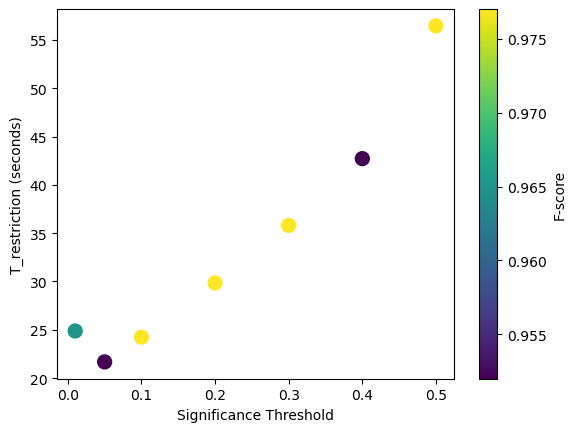

In [28]:
# Generate some example data
df = sig_dict['Alarm']
# Create a scatter plot with F-score on the y-axis and runtime on the x-axis
runtime = df['Runtime']
f_score = df['F-score']
sig_threshold = df['Significance Threshold']
fig, ax = plt.subplots()
scatter = ax.scatter(sig_threshold, runtime, c=f_score, cmap='viridis', s=100)

# Add labels and title to the plot
ax.set_xlabel('Significance Threshold')
ax.set_ylabel('T_restriction (seconds)')
# ax.set_yticks([])
# ax.set_title('Alarm Network : Trade-off between maximizing F-score and minimizing runtime')

# Add a colorbar for the significance threshold
cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.set_ylabel('F-score')

# Show the plot
plt.show()

### Barley Network

(0.0, 1.1)

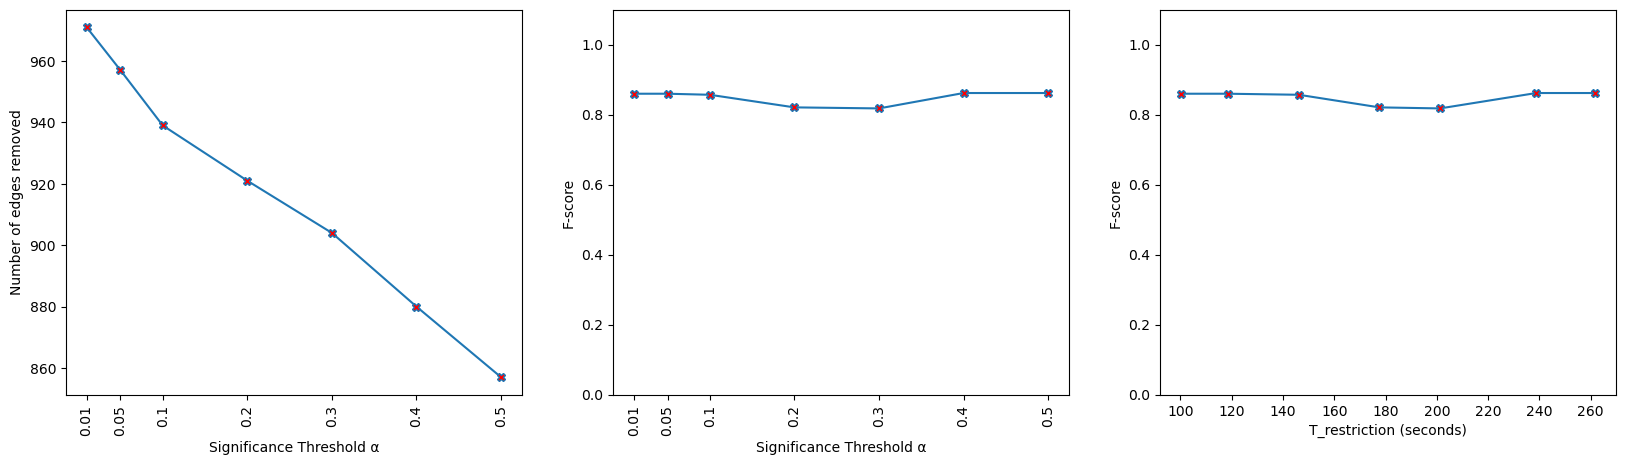

In [29]:
figure , axis = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
df = pd.DataFrame(sig_dict['Barley'])
x = np.array(df['Significance Threshold'])
y1 = np.array(df['Number of Edges Removed'])
y2 = np.array(df['F-score'])
y3 = np.array(df['Runtime'])

axis[0].plot(x,y1, marker='X', markerfacecolor='r')
axis[0].set_xlabel('Significance Threshold α')
axis[0].set_ylabel('Number of edges removed')
axis[0].set_xticks(df['Significance Threshold'], df['Significance Threshold'], rotation=90)

axis[1].plot(x,y2, marker='X', markerfacecolor='r')
axis[1].set_xlabel('Significance Threshold α')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Significance Threshold'], df['Significance Threshold'], rotation=90)
axis[1].set_ylim([0,1.1])


axis[2].plot(y3,y2, marker='X', markerfacecolor='r')
axis[2].set_xlabel('T_restriction (seconds)')
axis[2].set_ylabel('F-score')
axis[2].set_ylim([0,1.1])
# axis[2].set_xticks([])

# figure.suptitle('Barley Network : Relationship between Significance Threshold, F-score, and Runtime')

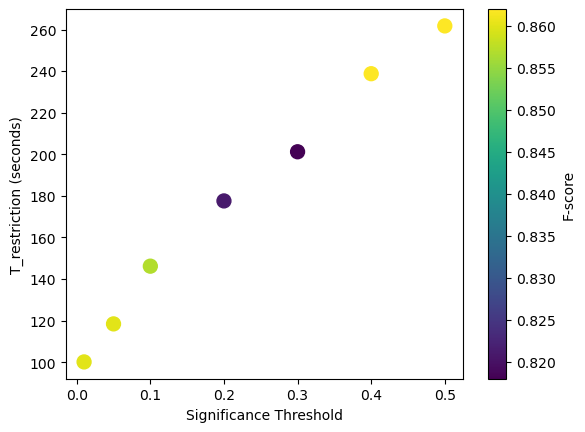

In [30]:
# Generate some example data
df = sig_dict['Barley']
# Create a scatter plot with F-score on the y-axis and runtime on the x-axis
runtime = df['Runtime']
f_score = df['F-score']
sig_threshold = df['Significance Threshold']
fig, ax = plt.subplots()
scatter = ax.scatter(sig_threshold, runtime, c=f_score, cmap='viridis', s=100)

# Add labels and title to the plot
ax.set_xlabel('Significance Threshold')
ax.set_ylabel('T_restriction (seconds)')
# ax.set_yticks([])

# ax.set_title('Barley Network : Trade-off between maximizing F-score and minimizing runtime')

# Add a colorbar for the significance threshold
cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.set_ylabel('F-score')

# Show the plot
plt.show()

### Hepar2

(0.0, 1.1)

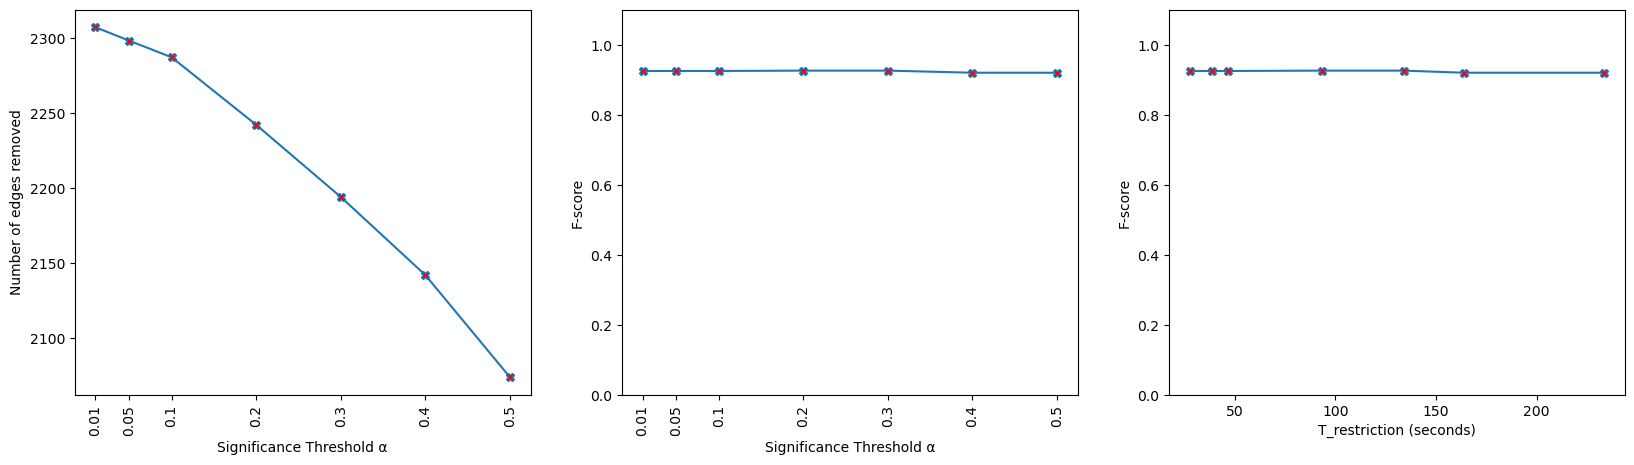

In [31]:
figure , axis = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
df = pd.DataFrame(sig_dict['Hepar2'])
x = np.array(df['Significance Threshold'])
y1 = np.array(df['Number of Edges Removed'])
y2 = np.array(df['F-score'])
y3 = np.array(df['Runtime'])

axis[0].plot(x,y1, marker='X', markerfacecolor='r')
axis[0].set_xlabel('Significance Threshold α')
axis[0].set_ylabel('Number of edges removed')
axis[0].set_xticks(df['Significance Threshold'], df['Significance Threshold'], rotation=90)

axis[1].plot(x,y2, marker='X', markerfacecolor='r')
axis[1].set_xlabel('Significance Threshold α')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Significance Threshold'], df['Significance Threshold'], rotation=90)
axis[1].set_ylim([0,1.1])


axis[2].plot(y3,y2, marker='X', markerfacecolor='r')
axis[2].set_xlabel('T_restriction (seconds)')
axis[2].set_ylabel('F-score')
axis[2].set_ylim([0,1.1])
# axis[2].set_xticks([])

# figure.suptitle('Hepar2 Network : Relationship between Significance Threshold, F-score, and Runtime')

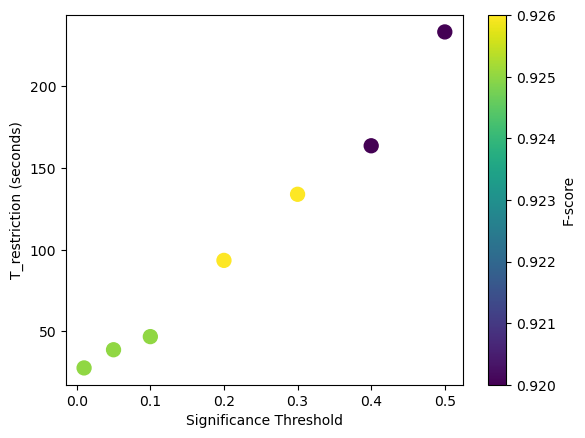

In [32]:
# Generate some example data
df = sig_dict['Hepar2']
# Create a scatter plot with F-score on the y-axis and runtime on the x-axis
runtime = df['Runtime']
f_score = df['F-score']
sig_threshold = df['Significance Threshold']
fig, ax = plt.subplots()
scatter = ax.scatter(sig_threshold, runtime, c=f_score, cmap='viridis', s=100)

# Add labels and title to the plot
ax.set_xlabel('Significance Threshold')
ax.set_ylabel('T_restriction (seconds)')
# ax.set_yticks([])

# ax.set_title('Hepar2 : Trade-off between maximizing F-score and minimizing runtime')

# Add a colorbar for the significance threshold
cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.set_ylabel('F-score')

# Show the plot
plt.show()

### Restriction

In [28]:
from scipy.interpolate import interp1d

In [33]:
asia_data = {'Network' : ['Asia', 'Asia', 'Asia', 'Asia'], 'Order of CI' : [0, 1, 2, 3], 'Number of Edges Restricted' : [8, 19, 20, 20], 'F-score' : [1.000, 1.000, 1.000, 1.000], 'T_r' : [0.061, 0.375, 1.165, 2.405], 'T_s' : [0.691, 0.529, 0.537, 0.536]}
asia_df = pd.DataFrame(asia_data)
asia_df['T_h'] = asia_df['T_r'] + asia_df['T_s']


child_data = {'Network' : ['Child', 'Child', 'Child', 'Child'], 'Order of CI' : [0, 1, 2, 3], 'Number of Edges Restricted' : [29, 154, 165, 165], 'F-score' : [0.980, 0.980, 0.980, 0.980], 'T_r' : [0.464, 12.200, 112.383, 1148.025], 'T_s' : [5.192, 2.108, 1.738, 1.738]}
child_df = pd.DataFrame(child_data)
child_df['T_h'] = child_df['T_r'] + child_df['T_s']


insurance_data = {'Network' : ['Insurance', 'Insurance', 'Insurance', 'Insurance'], 'Order of CI' : [0, 1, 2, 3], 'Number of Edges Restricted' : [89, 254, 308, 313], 'F-score' : [0.956, 0.967, 0.932, 0.881], 'T_r' : [0.805, 25.078, 282.264, 3694.755], 'T_s' : [27.537, 5.514, 2.411, 2.351]}
insurance_df = pd.DataFrame(insurance_data)
insurance_df['T_h'] = insurance_df['T_r'] + insurance_df['T_s']


water_data = {'Network' : ['Water', 'Water', 'Water'], 'Order of CI' : [0, 1, 2], 'Number of Edges Restricted' : [416, 470, 479], 'F-score' : [0.704, 0.606, 0.540], 'T_r' : [0.782, 2.697, 8.296], 'T_s' : [1.176, 0.549, 0.682]}
water_df = pd.DataFrame(water_data)
water_df['T_h'] = water_df['T_r'] + water_df['T_s']


alarm_data = {'Network' : ['Alarm', 'Alarm', 'Alarm'], 'Order of CI' : [0, 1, 2], 'Number of Edges Restricted' : [401, 593, 616], 'F-score' : [0.978, 0.952, 0.965], 'T_r' : [1.928, 31.658, 238.649], 'T_s' : [62.026, 4.297, 3.083]}
alarm_df = pd.DataFrame(alarm_data)
alarm_df['T_h'] = alarm_df['T_r'] + alarm_df['T_s']


barley_data = {'Network' : ['Barley', 'Barley', 'Barley'], 'Order of CI' : [0, 1, 2], 'Number of Edges Restricted' : [606, 957, None], 'F-score' : [0.898, 0.860, None], 'T_r' : [2.677, 139.220, None], 'T_s' : [33.300, 9.310, None]}
barley_df = pd.DataFrame(barley_data)
barley_df['T_h'] = barley_df['T_r'] + barley_df['T_s']

hailfinder_data = {'Network' : ['Hailfinder', 'Hailfinder', 'Hailfinder'], 'Order of CI' : [0, 1, 2], 'Number of Edges Restricted' : [1043, 1387, None], 'F-score' : [None, None, None], 'T_r' : [2.196, 33.650, None], 'T_s' : [28.070, 58.170, None]}
hailfinder_df = pd.DataFrame(hailfinder_data)
hailfinder_df['T_h'] = hailfinder_df['T_r'] + hailfinder_df['T_s']

hepar2_data = {'Network' : ['Hepar2', 'Hepar2', 'Hepar2'], 'Order of CI' : [0, 1, 2], 'Number of Edges Restricted' : [1942, 2298, None], 'F-score' : [None, None, None], 'T_r' : [5.640, 33.650, None], 'T_s' : [20.269, 5.988, None]}
hepar2_df = pd.DataFrame(hepar2_data)
hepar2_df['T_h'] = hepar2_df['T_r'] + hepar2_df['T_s']




res_dict = {'Asia' : asia_df, 'Child' : child_df, 'Insurance' : insurance_df, 'Water' : water_df, 'Alarm' : alarm_df, 'Barley' : barley_df}

In [34]:
n_edges = [8, 20, 27, 32, 37, 48, 56, 70]

In [35]:
joined_df = pd.concat([asia_df, child_df, insurance_df, water_df, alarm_df, barley_df, hailfinder_df, hepar2_df], axis=0)
CI_0 = joined_df.loc[joined_df['Order of CI'] == 0]
CI_0['Number of Edges'] = n_edges
CI_0

C:\Users\User\AppData\Local\Temp\ipykernel_16780\88810288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CI_0['Number of Edges'] = n_edges


Network  Order of CI  Number of Edges Restricted F-score    T_r     T_s  \
0        Asia            0                         8.0     1.0  0.061   0.691   
0       Child            0                        29.0    0.98  0.464   5.192   
0   Insurance            0                        89.0   0.956  0.805  27.537   
0       Water            0                       416.0   0.704  0.782   1.176   
0       Alarm            0                       401.0   0.978  1.928  62.026   
0      Barley            0                       606.0   0.898  2.677  33.300   
0  Hailfinder            0                      1043.0    None  2.196  28.070   
0      Hepar2            0                      1942.0    None  5.640  20.269   

      T_h  Number of Edges  
0   0.752                8  
0   5.656               20  
0  28.342               27  
0   1.958               32  
0  63.954               37  
0  35.977               48  
0  30.266               56  
0  25.909               70

In [36]:
CI_1 = joined_df[joined_df['Order of CI'] == 1]
CI_1['Number of Edges'] = n_edges
CI_1

C:\Users\User\AppData\Local\Temp\ipykernel_16780\3301329871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CI_1['Number of Edges'] = n_edges


Network  Order of CI  Number of Edges Restricted F-score      T_r  \
1        Asia            1                        19.0     1.0    0.375   
1       Child            1                       154.0    0.98   12.200   
1   Insurance            1                       254.0   0.967   25.078   
1       Water            1                       470.0   0.606    2.697   
1       Alarm            1                       593.0   0.952   31.658   
1      Barley            1                       957.0    0.86  139.220   
1  Hailfinder            1                      1387.0    None   33.650   
1      Hepar2            1                      2298.0    None   33.650   

      T_s      T_h  Number of Edges  
1   0.529    0.904                8  
1   2.108   14.308               20  
1   5.514   30.592               27  
1   0.549    3.246               32  
1   4.297   35.955               37  
1   9.310  148.530               48  
1  58.170   91.820               56  
1   5.988   39.638               70

In [37]:
k

Network Number of Variables Time Taken For GOBNILP Time Taken for Hybrid  \
0       Asia                   8                   1.79                  1.45   
1      Child                  20                   5.21                 15.14   
2  Insurance                  27                  32.55                 32.39   
3      Water                  32                  12.17                  4.47   
4      Alarm                  37                 211.31                 29.01   
5     Barley                  48                  99.35                145.23   
6     Hepar2                  70                 251.09                  67.5   

  Reduction in % F-score  
0          81.01     1.0  
1         291.94    0.98  
2          99.51   0.967  
3          36.73   0.606  
4          13.73   0.952  
5         146.18   0.788  
6          26.88   0.925

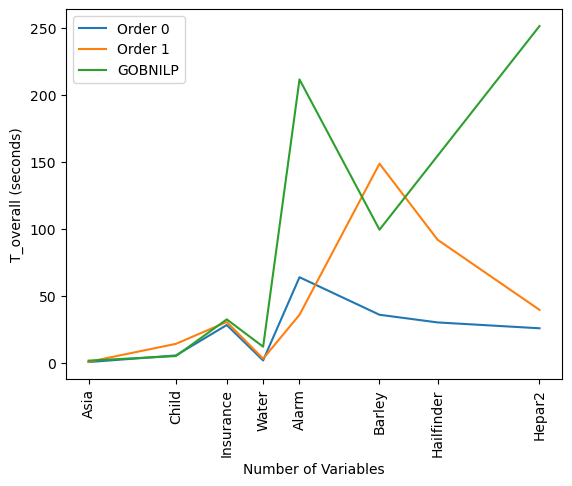

In [46]:
fig, ax = plt.subplots()

# plot data from table1
ax.plot(CI_0['Number of Edges'], CI_0['T_h'] ,label='Order 0')

# plot data from table2
ax.plot(CI_1['Number of Edges'], CI_1['T_h'], label='Order 1')

ax.plot(k['Number of Variables'], k['Time Taken For GOBNILP'], label='GOBNILP')
# set x and y axis labels
ax.set_xlabel('Number of Variables')
ax.set_ylabel('T_overall (seconds)')

ax.set_xticks(CI_0['Number of Edges'], CI_0['Network'], rotation=90)
# ax.set_yticks([])
# set plot title

# set legend
ax.legend()

# display the plot
plt.show()

### ASIA CI

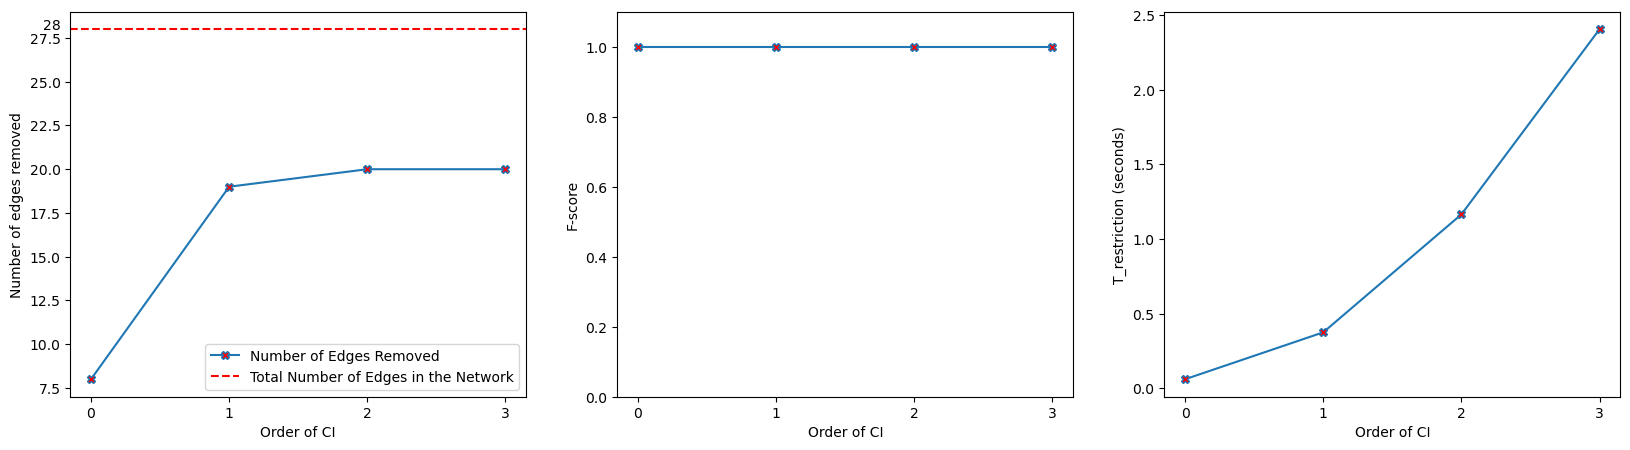

In [39]:
figure , axis = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
df = pd.DataFrame(res_dict['Asia'])
x = np.array(df['Order of CI'])
y1 = np.array(df['Number of Edges Restricted'])
y2 = np.array(df['F-score'])
y3 = np.array(df['T_r'])

axis[0].plot(x,y1, marker='X', markerfacecolor='red', label='Number of Edges Removed')
axis[0].set_xlabel('Order of CI')
axis[0].set_ylabel('Number of edges removed')
axis[0].set_xticks(df['Order of CI'], df['Order of CI'])
axis[0].axhline(y=28, c='r', linestyle='--', label='Total Number of Edges in the Network')
axis[0].text(-0.35, 28, '28')
axis[0].legend()

axis[1].plot(x,y2, marker='X', markerfacecolor='red')
axis[1].set_xlabel('Order of CI')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Order of CI'], df['Order of CI'])
axis[1].set_ylim([0, 1.1])


axis[2].plot(x,y3, marker='X', markerfacecolor='red')
axis[2].set_xlabel('Order of CI')
axis[2].set_ylabel('T_restriction (seconds)')
# axis[2].set_yticks([])
axis[2].set_xticks(df['Order of CI'], df['Order of CI'])

plt.show()
# figure.suptitle('Asia Network : Relationship between CI order, F-score and Runtime')

### CHILD CI

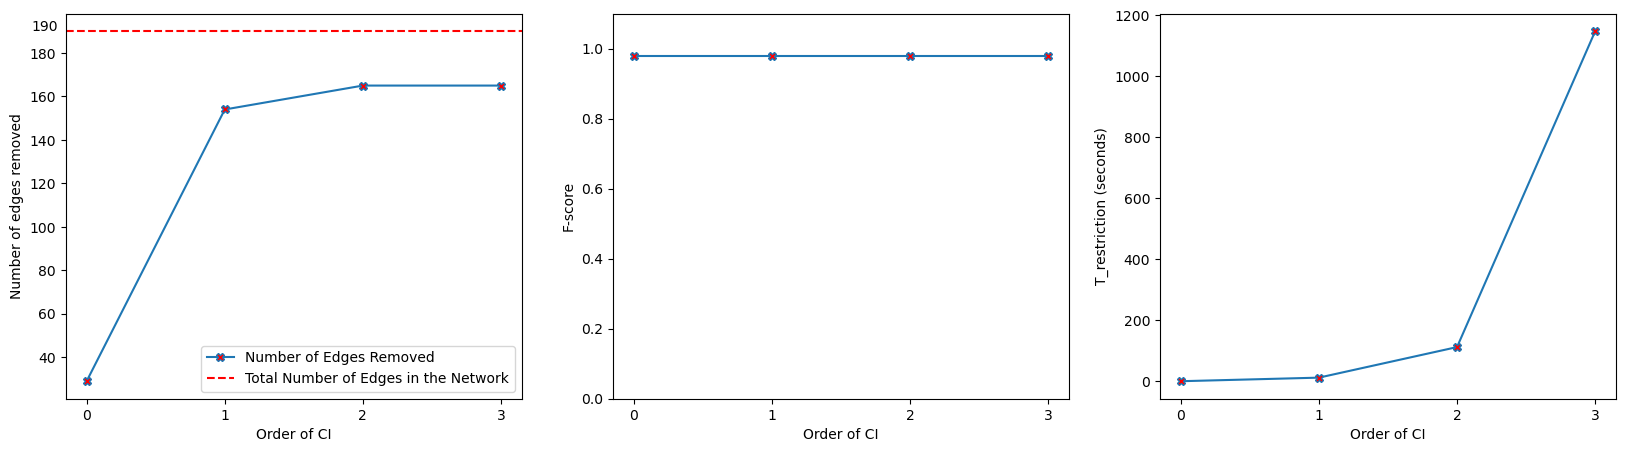

In [41]:
figure , axis = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
df = pd.DataFrame(res_dict['Child'])
x = np.array(df['Order of CI'])
y1 = np.array(df['Number of Edges Restricted'])
y2 = np.array(df['F-score'])
y3 = np.array(df['T_r'])

axis[0].plot(x,y1, marker='X', markerfacecolor='red', label='Number of Edges Removed')
axis[0].set_xlabel('Order of CI')
axis[0].set_ylabel('Number of edges removed')
axis[0].set_xticks(df['Order of CI'], df['Order of CI'])
axis[0].axhline(y=190, c='r', linestyle='--', label='Total Number of Edges in the Network')
axis[0].text(-0.4, 190, '190')
axis[0].legend()

axis[1].plot(x,y2, marker='X', markerfacecolor='red')
axis[1].set_xlabel('Order of CI')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Order of CI'], df['Order of CI'])
axis[1].set_ylim([0, 1.1])

axis[2].plot(x,y3, marker='X', markerfacecolor='red')
axis[2].set_xlabel('Order of CI')
axis[2].set_ylabel('T_restriction (seconds)')
axis[2].set_xticks(df['Order of CI'], df['Order of CI'])
# axis[2].set_yticks([])

# figure.suptitle('Child Network : Relationship between CI order, F-score and Runtime')

### insurance CI

In [32]:
df

Significance Threshold  Number of Edges Removed  F-score  Runtime
0                    0.01                     2307    0.925    27.61
1                    0.05                     2298    0.925    38.74
2                    0.10                     2287    0.925    46.78
3                    0.20                     2242    0.926    93.47
4                    0.30                     2194    0.926   133.96
5                    0.40                     2142    0.920   163.66
6                    0.50                     2074    0.920   233.39

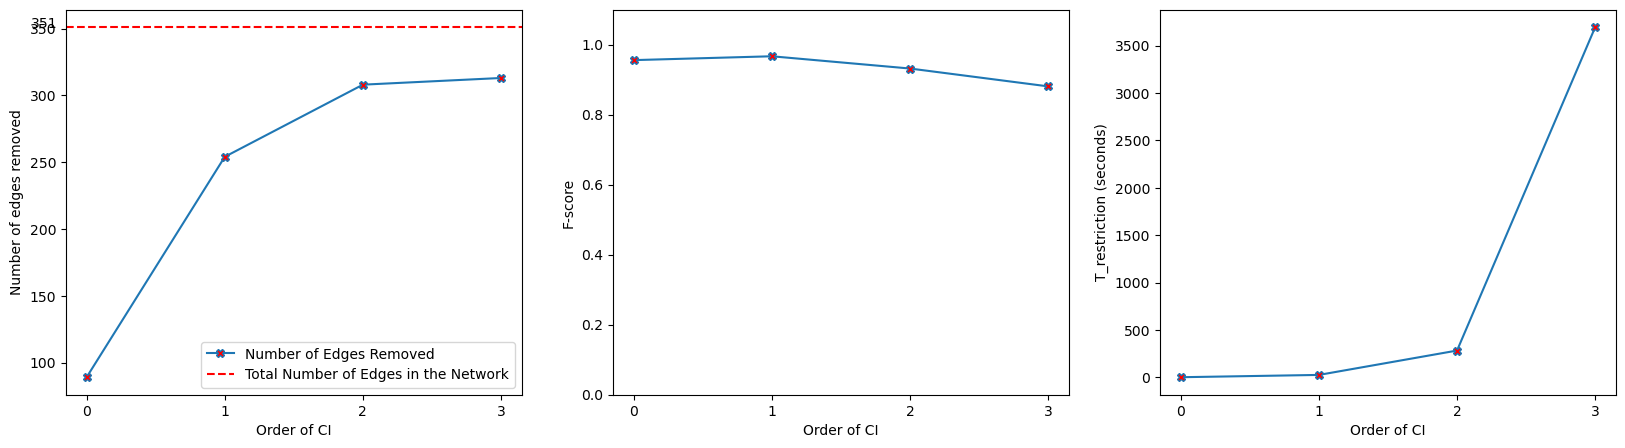

In [42]:
figure , axis = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
df = pd.DataFrame(res_dict['Insurance'])
x = np.array(df['Order of CI'])
y1 = np.array(df['Number of Edges Restricted'])
y2 = np.array(df['F-score'])
y3 = np.array(df['T_r'])

axis[0].plot(x,y1, marker='X', markerfacecolor='red', label='Number of Edges Removed')
axis[0].set_xlabel('Order of CI')
axis[0].set_ylabel('Number of edges removed')
axis[0].set_xticks(df['Order of CI'], df['Order of CI'])
axis[0].axhline(y=351, c='r', linestyle='--', label='Total Number of Edges in the Network')
axis[0].text(-0.4, 351, '351')
axis[0].legend()

axis[1].plot(x,y2, marker='X', markerfacecolor='red')
axis[1].set_xlabel('Order of CI')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Order of CI'], df['Order of CI'])
axis[1].set_ylim([0, 1.1])


axis[2].plot(x,y3, marker='X', markerfacecolor='red')
axis[2].set_xlabel('Order of CI')
axis[2].set_ylabel('T_restriction (seconds)')
axis[2].set_xticks(df['Order of CI'], df['Order of CI'])
# axis[2].set_yticks([])
# figure.suptitle('Insurance Network : Relationship between CI order, F-score and Runtime')

### Water CI

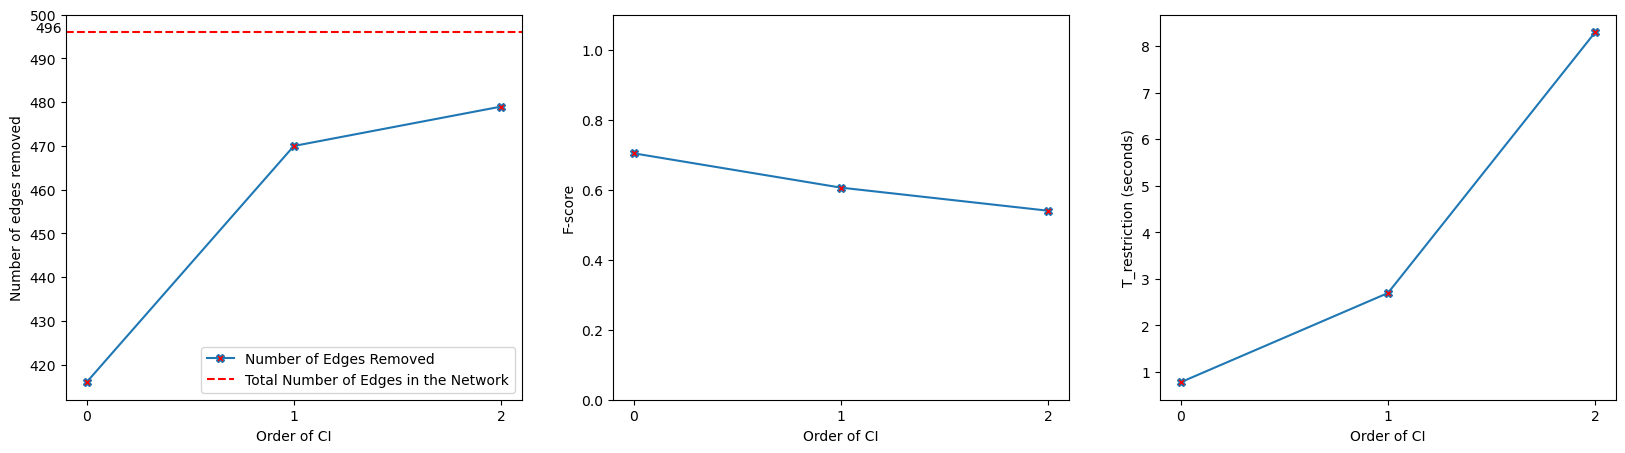

In [43]:
figure , axis = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
df = pd.DataFrame(res_dict['Water'])
x = np.array(df['Order of CI'])
y1 = np.array(df['Number of Edges Restricted'])
y2 = np.array(df['F-score'])
y3 = np.array(df['T_r'])

axis[0].plot(x,y1, marker='X', markerfacecolor='red', label='Number of Edges Removed')
axis[0].set_xlabel('Order of CI')
axis[0].set_ylabel('Number of edges removed')
axis[0].set_xticks(df['Order of CI'], df['Order of CI'])
axis[0].axhline(y=496, c='r', linestyle='--', label='Total Number of Edges in the Network')
axis[0].text(-0.25, 496, '496')
axis[0].legend()

axis[1].plot(x,y2, marker='X', markerfacecolor='red')
axis[1].set_xlabel('Order of CI')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Order of CI'], df['Order of CI'])
axis[1].set_ylim([0, 1.1])


axis[2].plot(x,y3, marker='X', markerfacecolor='red')
axis[2].set_xlabel('Order of CI')
axis[2].set_ylabel('T_restriction (seconds)')
axis[2].set_xticks(df['Order of CI'], df['Order of CI'])
# axis[2].set_yticks([])

# figure.suptitle('Water Network : Relationship between CI order, F-score and Runtime')

### Alarm

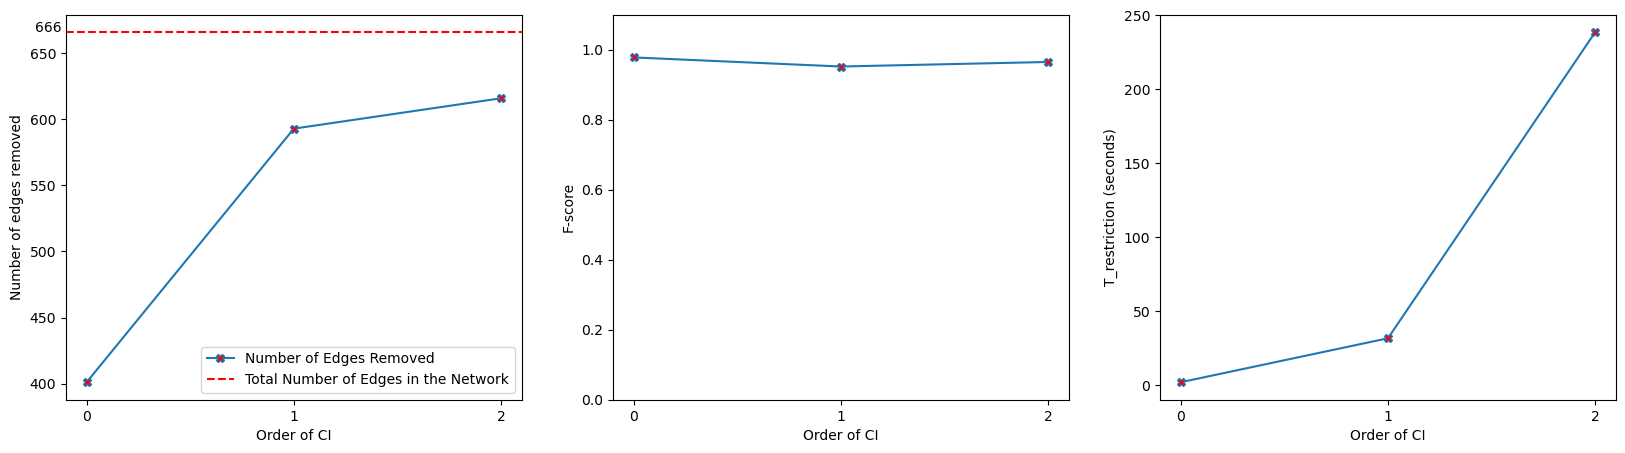

In [44]:
figure , axis = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
df = pd.DataFrame(res_dict['Alarm'])
x = np.array(df['Order of CI'])
y1 = np.array(df['Number of Edges Restricted'])
y2 = np.array(df['F-score'])
y3 = np.array(df['T_r'])

axis[0].plot(x,y1, marker='X', markerfacecolor='red', label='Number of Edges Removed')
axis[0].set_xlabel('Order of CI')
axis[0].set_ylabel('Number of edges removed')
axis[0].set_xticks(df['Order of CI'], df['Order of CI'])
axis[0].axhline(y=666, c='r', linestyle='--', label='Total Number of Edges in the Network')
axis[0].text(-0.25, 666, '666')
axis[0].legend()

axis[1].plot(x,y2, marker='X', markerfacecolor='red')
axis[1].set_xlabel('Order of CI')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Order of CI'], df['Order of CI'])
axis[1].set_ylim([0, 1.1])

axis[2].plot(x,y3, marker='X', markerfacecolor='red')
axis[2].set_xlabel('Order of CI')
axis[2].set_ylabel('T_restriction (seconds)')
axis[2].set_xticks(df['Order of CI'], df['Order of CI'])
# axis[2].set_yticks([])
plt.show()
# figure.suptitle('Alarm Network : Relationship between CI order, F-score and Runtime')

### Barley

### Parent Limit Changes

In [10]:
T_restrict_asia = 0.044
asia_data = {'Network' : ['Asia', 'Asia', 'Asia', 'Asia', 'Asia'], 'Parent Limit' : [2, 3, 4, 5, 6],  'T_gobnilp' : [1.385, 1.143, 0.814, 0.797, 0.793], 'T_score' : [0.691, 0.422, 0.380, 0.402, 0.369], 'F-score' : [1.000, 1.000, 1.000, 1.000, 1.000]}
asia_df = pd.DataFrame(asia_data)
asia_df['T_hybrid'] = asia_df['T_score'] + T_restrict_asia

T_restrict_child = 7.000
child_data = {'Network' : ['Child', 'Child', 'Child', 'Child', 'Child'], 'Parent Limit' : [2, 3, 4, 5, 6],  'T_gobnilp' : [1.798, 2.704, 3.907, 7.841 , 20.018], 'T_score' : [1.120, 1.276, 1.241 , 1.543, 1.647], 'F-score' : [1.000, 1.000, 0.980, 0.980, 0.980]}
child_df = pd.DataFrame(child_data)
child_df['T_hybrid'] = child_df['T_score'] + T_restrict_child


T_restrict_insurance = 15.412
insurance_data = {'Network' : ['Insurance', 'Insurance', 'Insurance', 'Insurance', 'Insurance'], 'Parent Limit' : [2, 3, 4, 5, 6],  'T_gobnilp' : [7.571, 21.216, 37.339, 82.918, 236.955], 'T_score' : [2.275, 3.031, 3.398, 5.131, 5.912], 'F-score' : [0.967, 0.967, 0.966, 0.989, 0.989]}
insurance_df = pd.DataFrame(insurance_data)
insurance_df['T_hybrid'] = insurance_df['T_score'] + T_restrict_insurance

T_restrict_water = 1.793
water_data = {'Network' : ['Water', 'Water', 'Water', 'Water', 'Water'], 'Parent Limit' : [2, 3, 4, 5, 6],  'T_gobnilp' : [2.107, 6.077, 15.671, 66.360, 332.555], 'T_score' : [0.360, 0.327, 0.343, 0.405, 0.410], 'F-score' : [0.635, 0.606, 0.588, 0.580, 0.580]}
water_df = pd.DataFrame(water_data)
water_df['T_hybrid'] = water_df['T_score'] + T_restrict_water

T_restrict_alarm = 15.342
alarm_data = {'Network' : ['Alarm', 'Alarm', 'Alarm', 'Alarm', 'Alarm'], 'Parent Limit' : [2, 3, 4, 5, 6],  'T_gobnilp' : [50.374, 158.433, 421.403, 490.050, 2195.985], 'T_score' : [2.145, 2.685, 3.111, 2.340, 2.350], 'F-score' : [1.000, 0.952, 1.000, 1.000, 1.000]}
alarm_df = pd.DataFrame(alarm_data)
alarm_df['T_hybrid'] = alarm_df['T_score'] + T_restrict_alarm

T_restrict_barley = 170.506
barley_data = {'Network' : ['Barley', 'Barley', 'Barley', 'Barley', 'Barley'], 'Parent Limit' : [2, 3, 4, 5, 6],  'T_gobnilp' : [25.309, 147.543, 1784.121, None, None], 'T_score' : [4.759, 9.433, 17.124, None, None], 'F-score' : [0.852, 0.782, 0.800, None, None]}
barley_df = pd.DataFrame(barley_data)
barley_df['T_hybrid'] = barley_df['T_score'] + T_restrict_barley


T_restrict_hepar2 = 39.965
hepar2_data = {'Network' : ['Hepar2', 'Hepar2', 'Hepar2', 'Hepar2', 'Hepar2'], 'Parent Limit' : [2, 3, 4, 5, 6],  'T_gobnilp' : [15.230, 206.901, 1912.798, None, None], 'T_score' : [4.543, 7.381, 9.111, 13.831, 18.800], 'F-score' : [0.912, 0.925, 0.925, None, None]}
hepar2_df = pd.DataFrame(hepar2_data)
hepar2_df['T_hybrid'] = hepar2_df['T_score'] + T_restrict_hepar2

#plotting T_gobnilp vs T_hybrid on different parent limit
#plotting T_gobnilp vs 

In [13]:
asia_df

Network  Parent Limit  T_gobnilp  T_score  F-score  T_hybrid
0    Asia             2      1.385    0.691      1.0     0.735
1    Asia             3      1.143    0.422      1.0     0.466
2    Asia             4      0.814    0.380      1.0     0.424
3    Asia             5      0.797    0.402      1.0     0.446
4    Asia             6      0.793    0.369      1.0     0.413

### plots

(0.0, 1.1)

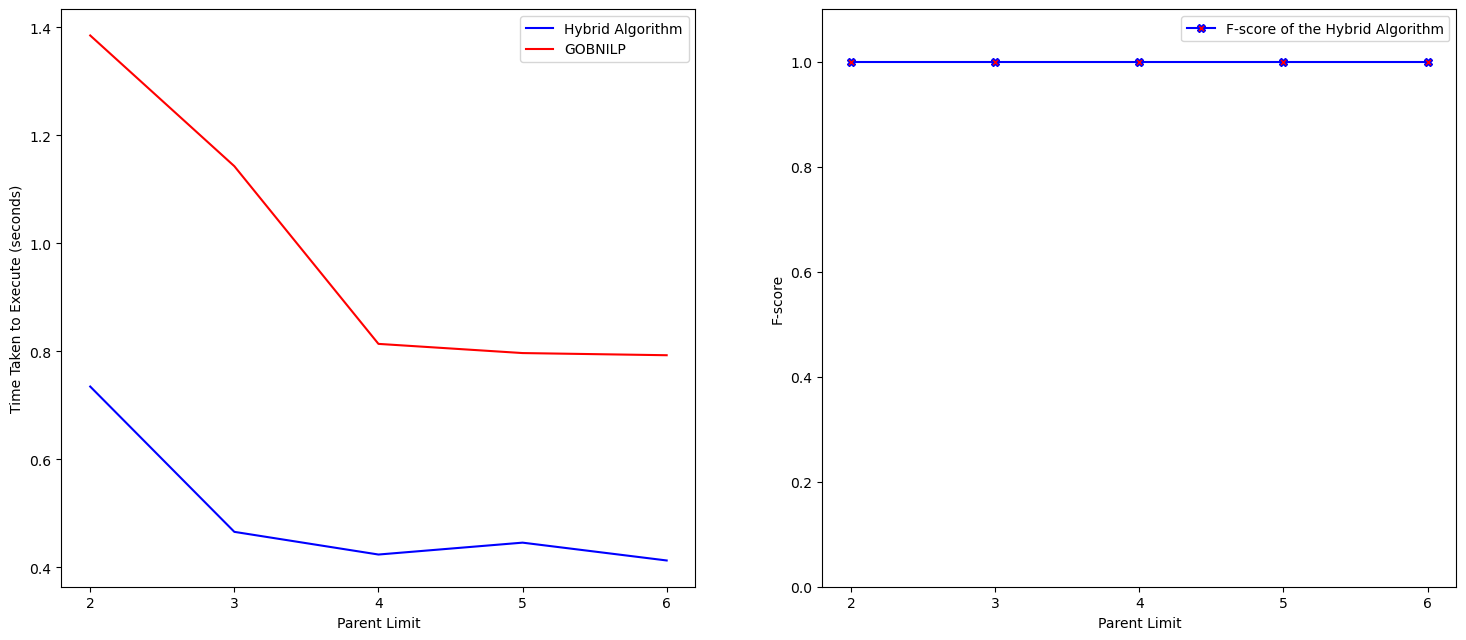

In [33]:
'''
Asia network
'''
figure , axis = plt.subplots(nrows=1, ncols=2, figsize=(18,7.5))
df = asia_df
x = np.array(df['Parent Limit'])
y1 = np.array(df['T_hybrid'])
y2 = np.array(df['T_gobnilp'])
y3 = np.array(df['F-score'])

axis[0].plot(x,y1, label='Hybrid Algorithm', c='b')
axis[0].plot(x, y2, label='GOBNILP', c='r')
axis[0].set_xlabel('Parent Limit')
axis[0].set_ylabel('Time Taken to Execute (seconds)')
axis[0].set_xticks(df['Parent Limit'], df['Parent Limit'])
# axis[0].axhline(y=496, c='r', linestyle='--', label='Total Number of Edges in the Network')
# axis[0].text(-0.25, 496, '496')
axis[0].legend()

axis[1].plot(x,y3, marker='X', markerfacecolor='red', label='F-score of the Hybrid Algorithm', c='b')
axis[1].set_xlabel('Parent Limit')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Parent Limit'], df['Parent Limit'])
axis[1].legend()
axis[1].set_ylim([0, 1.1])
# axis[1].set_ylim([0, 1.1])


# axis[2].plot(x,y3, marker='X', markerfacecolor='red')
# axis[2].set_xlabel('Order of CI')
# axis[2].set_ylabel('T_restriction (seconds)')
# axis[2].set_xticks(df['Order of CI'], df['Order of CI'])

(0.0, 1.1)

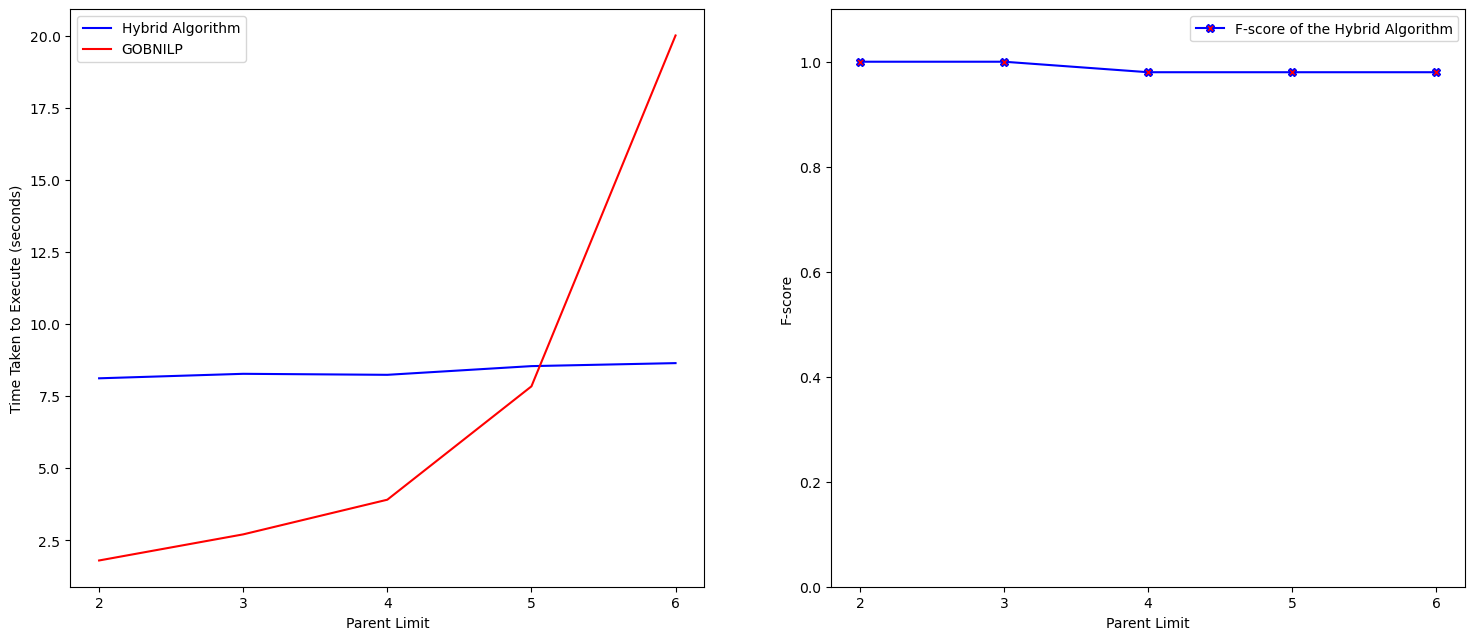

In [32]:
'''
Child Network
'''
figure , axis = plt.subplots(nrows=1, ncols=2, figsize=(18,7.5))
df = child_df
x = np.array(df['Parent Limit'])
y1 = np.array(df['T_hybrid'])
y2 = np.array(df['T_gobnilp'])
y3 = np.array(df['F-score'])

axis[0].plot(x,y1, label='Hybrid Algorithm', c='b')
axis[0].plot(x, y2, label='GOBNILP', c='r')
axis[0].set_xlabel('Parent Limit')
axis[0].set_ylabel('Time Taken to Execute (seconds)')
axis[0].set_xticks(df['Parent Limit'], df['Parent Limit'])
# axis[0].axhline(y=496, c='r', linestyle='--', label='Total Number of Edges in the Network')
# axis[0].text(-0.25, 496, '496')
axis[0].legend()

axis[1].plot(x,y3, marker='X', markerfacecolor='red', label='F-score of the Hybrid Algorithm', c='b')
axis[1].set_xlabel('Parent Limit')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Parent Limit'], df['Parent Limit'])
axis[1].legend()
axis[1].set_ylim([0, 1.1])


(0.0, 1.1)

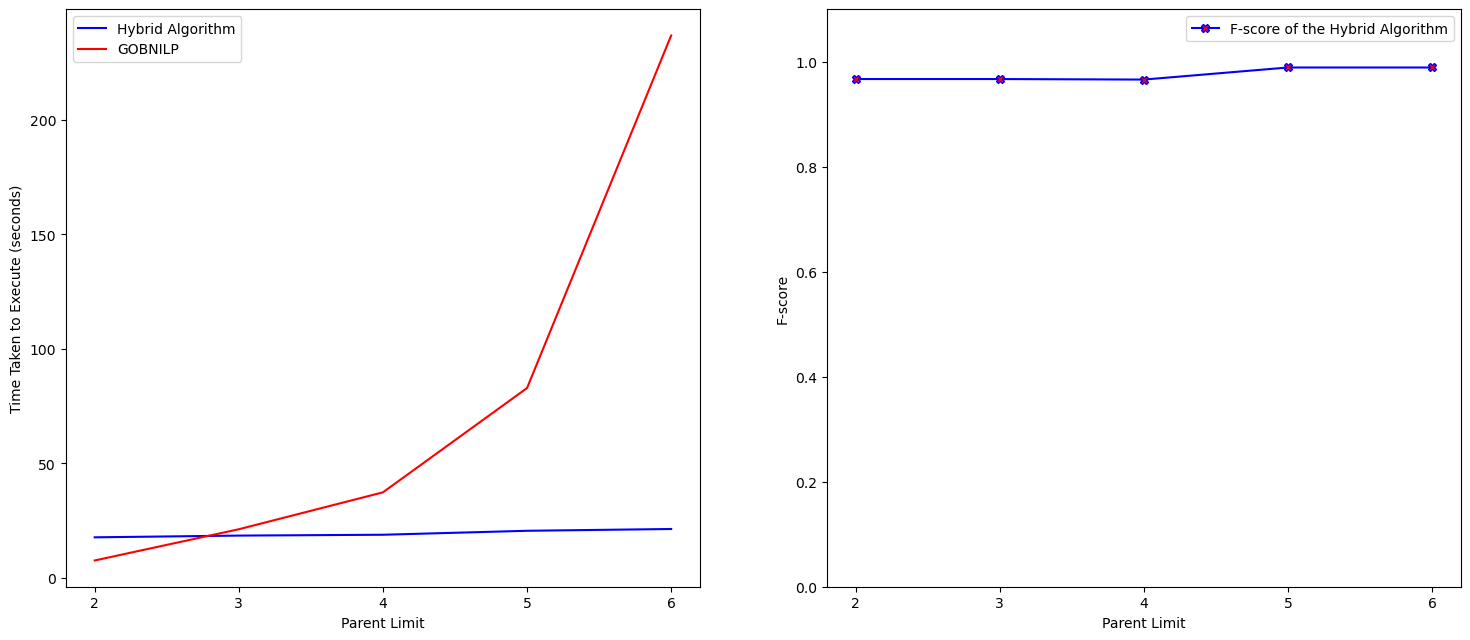

In [34]:
'''
Insurance Network
'''
figure , axis = plt.subplots(nrows=1, ncols=2, figsize=(18,7.5))
df = insurance_df
x = np.array(df['Parent Limit'])
y1 = np.array(df['T_hybrid'])
y2 = np.array(df['T_gobnilp'])
y3 = np.array(df['F-score'])

axis[0].plot(x,y1, label='Hybrid Algorithm', c='b')
axis[0].plot(x, y2, label='GOBNILP', c='r')
axis[0].set_xlabel('Parent Limit')
axis[0].set_ylabel('Time Taken to Execute (seconds)')
axis[0].set_xticks(df['Parent Limit'], df['Parent Limit'])
# axis[0].axhline(y=496, c='r', linestyle='--', label='Total Number of Edges in the Network')
# axis[0].text(-0.25, 496, '496')
axis[0].legend()

axis[1].plot(x,y3, marker='X', markerfacecolor='red', label='F-score of the Hybrid Algorithm', c='b')
axis[1].set_xlabel('Parent Limit')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Parent Limit'], df['Parent Limit'])
axis[1].legend()
axis[1].set_ylim([0, 1.1])

(0.0, 1.1)

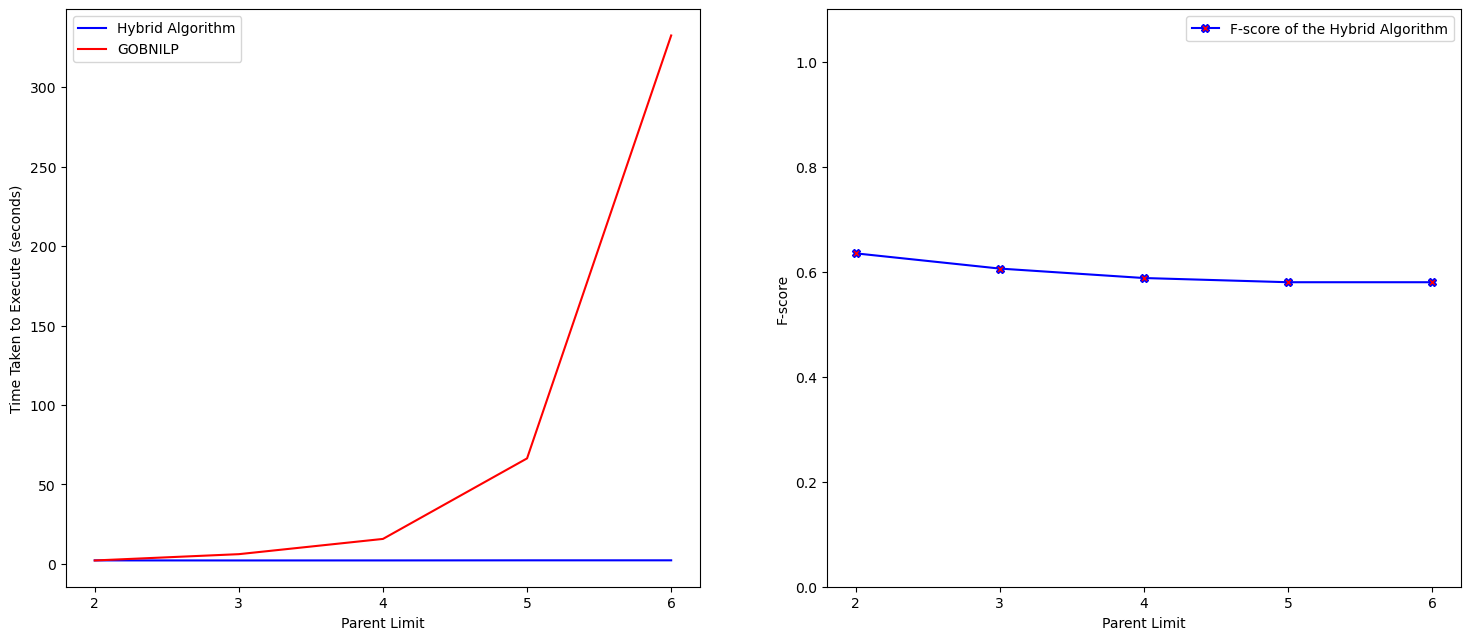

In [35]:
'''
Water Network
'''
figure , axis = plt.subplots(nrows=1, ncols=2, figsize=(18,7.5))
df = water_df
x = np.array(df['Parent Limit'])
y1 = np.array(df['T_hybrid'])
y2 = np.array(df['T_gobnilp'])
y3 = np.array(df['F-score'])

axis[0].plot(x,y1, label='Hybrid Algorithm', c='b')
axis[0].plot(x, y2, label='GOBNILP', c='r')
axis[0].set_xlabel('Parent Limit')
axis[0].set_ylabel('Time Taken to Execute (seconds)')
axis[0].set_xticks(df['Parent Limit'], df['Parent Limit'])
# axis[0].axhline(y=496, c='r', linestyle='--', label='Total Number of Edges in the Network')
# axis[0].text(-0.25, 496, '496')
axis[0].legend()

axis[1].plot(x,y3, marker='X', markerfacecolor='red', label='F-score of the Hybrid Algorithm', c='b')
axis[1].set_xlabel('Parent Limit')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Parent Limit'], df['Parent Limit'])
axis[1].legend()
axis[1].set_ylim([0, 1.1])

(0.0, 1.1)

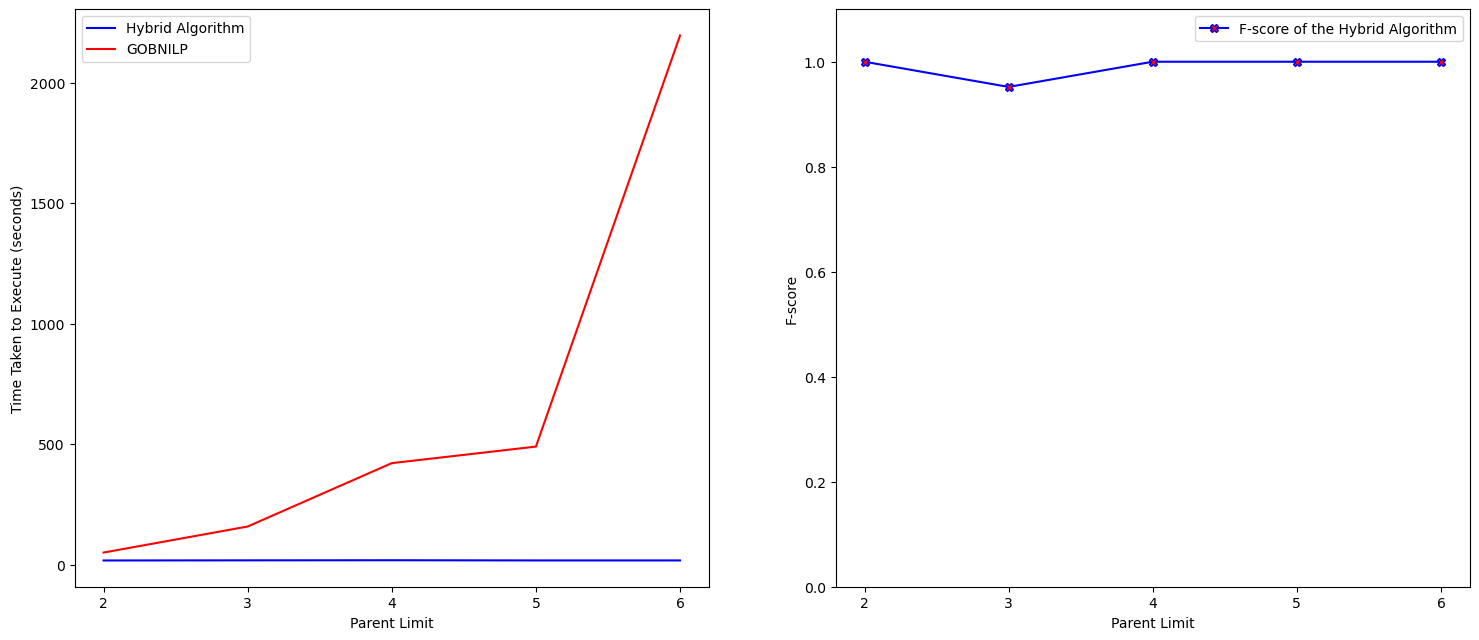

In [36]:
'''
Alarm Network
'''
figure , axis = plt.subplots(nrows=1, ncols=2, figsize=(18,7.5))
df = alarm_df
x = np.array(df['Parent Limit'])
y1 = np.array(df['T_hybrid'])
y2 = np.array(df['T_gobnilp'])
y3 = np.array(df['F-score'])

axis[0].plot(x,y1, label='Hybrid Algorithm', c='b')
axis[0].plot(x, y2, label='GOBNILP', c='r')
axis[0].set_xlabel('Parent Limit')
axis[0].set_ylabel('Time Taken to Execute (seconds)')
axis[0].set_xticks(df['Parent Limit'], df['Parent Limit'])
# axis[0].axhline(y=496, c='r', linestyle='--', label='Total Number of Edges in the Network')
# axis[0].text(-0.25, 496, '496')
axis[0].legend()

axis[1].plot(x,y3, marker='X', markerfacecolor='red', label='F-score of the Hybrid Algorithm', c='b')
axis[1].set_xlabel('Parent Limit')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Parent Limit'], df['Parent Limit'])
axis[1].legend()
axis[1].set_ylim([0, 1.1])

(1.8, 4.2)

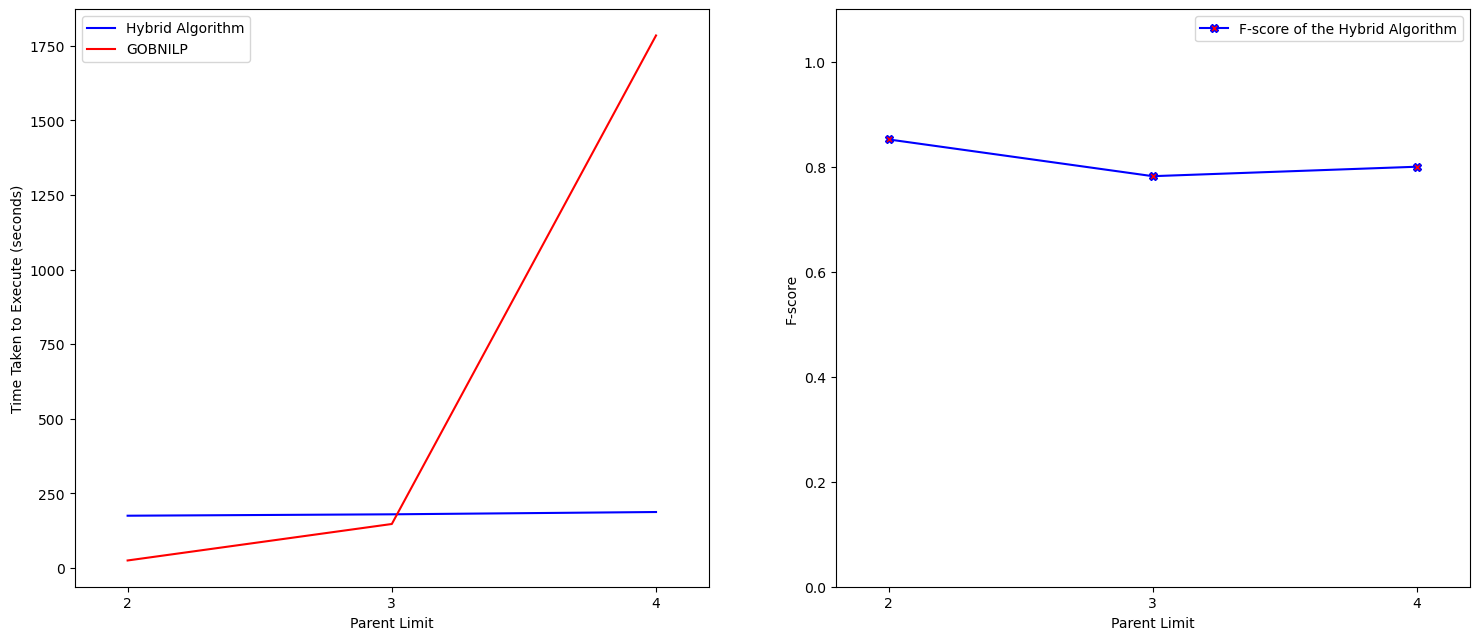

In [42]:
'''
Barley Network
'''
figure , axis = plt.subplots(nrows=1, ncols=2, figsize=(18,7.5))
df = barley_df
x = np.array(df['Parent Limit'])
y1 = np.array(df['T_hybrid'])
y2 = np.array(df['T_gobnilp'])
y3 = np.array(df['F-score'])

axis[0].plot(x,y1, label='Hybrid Algorithm', c='b')
axis[0].plot(x, y2, label='GOBNILP', c='r')
axis[0].set_xlabel('Parent Limit')
axis[0].set_ylabel('Time Taken to Execute (seconds)')
axis[0].set_xticks(df['Parent Limit'], df['Parent Limit'])
axis[0].set_xlim([1.8, 4.2])
# axis[0].axhline(y=496, c='r', linestyle='--', label='Total Number of Edges in the Network')
# axis[0].text(-0.25, 496, '496')
axis[0].legend()

axis[1].plot(x,y3, marker='X', markerfacecolor='red', label='F-score of the Hybrid Algorithm', c='b')
axis[1].set_xlabel('Parent Limit')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Parent Limit'], df['Parent Limit'])
axis[1].legend()
axis[1].set_ylim([0, 1.1])
axis[1].set_xlim([1.8, 4.2])

(1.8, 4.2)

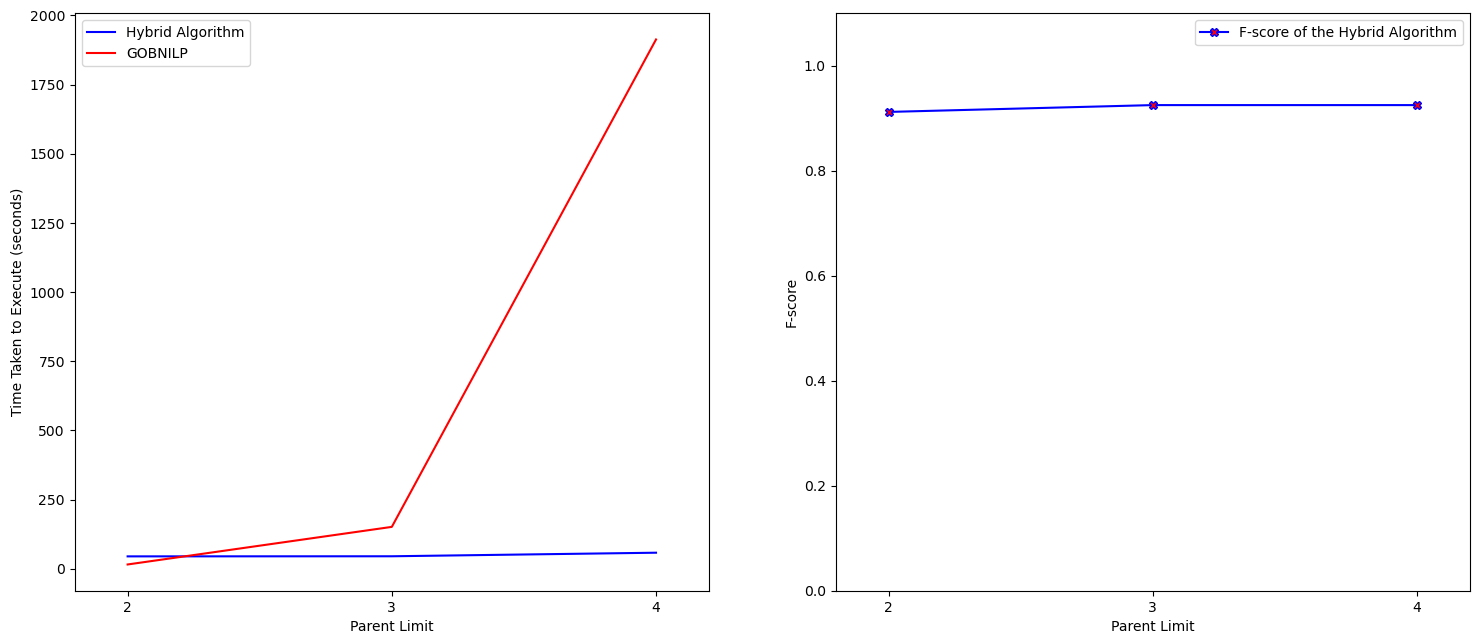

In [43]:
'''
Hepar2 Network
'''
figure , axis = plt.subplots(nrows=1, ncols=2, figsize=(18,7.5))
df = hepar2_df
x = np.array(df['Parent Limit'])
y1 = np.array(df['T_hybrid'])
y2 = np.array(df['T_gobnilp'])
y3 = np.array(df['F-score'])

axis[0].plot(x,y1, label='Hybrid Algorithm', c='b')
axis[0].plot(x, y2, label='GOBNILP', c='r')
axis[0].set_xlabel('Parent Limit')
axis[0].set_ylabel('Time Taken to Execute (seconds)')
axis[0].set_xticks(df['Parent Limit'], df['Parent Limit'])
axis[0].set_xlim([1.8, 4.2])
# axis[0].axhline(y=496, c='r', linestyle='--', label='Total Number of Edges in the Network')
# axis[0].text(-0.25, 496, '496')
axis[0].legend()

axis[1].plot(x,y3, marker='X', markerfacecolor='red', label='F-score of the Hybrid Algorithm', c='b')
axis[1].set_xlabel('Parent Limit')
axis[1].set_ylabel('F-score')
axis[1].set_xticks(df['Parent Limit'], df['Parent Limit'])
axis[1].legend()
axis[1].set_ylim([0, 1.1])
axis[1].set_xlim([1.8, 4.2])